# 목차



##### 1단계 : 문제정의와 가설설정
1. 문제정의와 가설설정
2. 성능측정지표 선정

##### 2단계 : 자료수집과 정제
1. 연구계획수립 및 자료수집     
2. 자료준비\
    - 탐색적 데이터 분석(Exploring Data Analysis), 자료형Dtype.canvas|자료형 확인\
    - 결측치처리  \
    - 가변수화\
    - 스케일링\
    - 변환파이프라인 설정
1. 데이터분할 
    - 교차검정데이터세트 분할\
    - 임의성 및 대표성 확인\
    - 클래스불균형 확인
##### 3단계 : 탐색적 데이터 분석(Exploring Data Analysis)
1. 일변량 데이터(X, y) 탐색    \
    - 분포확인, 기술통계량 측정과 시각화	\
    - 종속변수(y) 정규성 확인\
    - 특이값 확인
  
2. 2변량 데이터(X~X, y~X) 탐색\
    - 분포확인, 기술통계량 측정과 시각화\
    - 상관계수 분석    \
    - 편잔차분석    
##### 4단계 : 자료가공(wrangling)과 데이터준비(preparation)
1. 자료가공\
    - 범주형 변수 인코딩\
    - 특성공학 : 스케일링과 스트럭쳐링
2. 특성선택
##### 5단계 : 모델구체화 
1. 선형모델
2. 다항회귀모델
4. 기계학습\
    - 비지도학습 : 의사결정나무, KNN\
    - 인공신경망모형 : DNN\
    - 지도학습 : 랜덤포레스트
5. 회귀해석
6. 회귀진단 
7. 모델성능개선 

#### 임포트


In [337]:
import pandas as pd
import numpy as np
import os
import sys
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

#### 환경설정

In [338]:
import os

dir = r"C:\Users\ENVY360\OneDrive\바탕 화면\포트폴리오\(EDA중점) intercross_부동산 가격 예측".replace("\\", "/")
os.chdir(dir)
os.getcwd()                                        

'C:\\Users\\ENVY360\\OneDrive\\바탕 화면\\포트폴리오\\(EDA중점) intercross_부동산 가격 예측'

# 확인해야할 것


<span style="color:yellow">확인해야할 것
</span><br>


<span style="color:yellow">부동산 공정가치평가 다른 방법들을 고려할 수 있을까 : 비용접근, 수익접근</span><br>
<span style="color:yellow">외부환경요인들을 포함할 수 있을까 : 인구성장률, 물가상승률, 세금, 금리 등</span><br>
<span style="color:yellow">categorical 값 중에는 모델 전체의 %를 결정하는 것도 있을것 같은데, 예를 들면 설립연도</span><br>
<span style="color:yellow">features가 너무 많아서 한국사이트에서 구할 수 있는 자료형에 대해서만 한정하는 것이 좋아보이는데</span><br>

<span style="color:yellow"> 분리되어서 제공된 train과 test의 대표성도 확인을 해야한다.</span><br>
<span style="color:yellow">0. 숫자로 된 categorical variable도 있음!</span><br>
<span style="color:yellow">1. Train-Test 말고 K-fold 형태의 검정 고려</span><br>
<span style="color:yellow">2. Train-Test 말고 Train-CrossValidation-Test 형태 데이터 분류 고려</span>
<span style="color:yellow">목적함수에 대해서는 시각화를 해서 통계적 비정상성이 있는지를 정확하게 확인을 해 줄 필요가 있습니다.</span><br>
##### 5단계 : 모델 선택 : 
<span style="color:yellow">깔끔하게 표현하는 것에 중심을</span><br>
<span style="color:yellow">반드시 전통통계 기반 모델에 충실하게 보여줄 것 : 분포가정, mc, historical, 다양한 분포가정</span><br>
<span style="color:yellow">그 다음에 전통통계 극복 사례를 보여줄 것 : bootstrapping _ 결측치 해결에 사용할 수 있을까</span><br>

##### 6단계 : 모델 튜닝
<span style="color:yellow">가능하다면 tableau를 이용하는 것도 보여줄 수 있다면?</span><br>

##### 7단계 : 서비스 개시 및 유지보수 : streamlit을 이용한 서비스의 배포 (새로 지어질 아파트의 공정가치는 얼마일까)
<span style="color:yellow">streamlit을 이용해서 신축예정 아파트의 활성시장 거래가를 추정해본다면?</span><br>

# 1단계 : 문제정의와 가설설정

## 1. 문제정의와 가설설정

1. 문제정의
- **목적** : 보스턴의 부동산 가격 예측 (회귀문제)
- **사용주체** : 부동산 매수매도와 관련된 모든 이해관계자 (투기업자, 건설사, 시행사, 부동산 등)
- **온라인/배치학습** : 배치학습
- 학습기반 (사례기반학습/모델기반학습) : 모델기반
- 성능측정지표 (Metric) : log scale RMSE (kaggle 제공)
- 출력 결과물 : ID 별 부동산 가격 예측값
- 기계학습 활용의 당위 : 건물의 명세정보를 이용한 (욕조 수 등) 대형회귀모델 구축 필요 (기존 부동산 가격 책정법과 상이한 방식의 접근)<br>
2. 가설설정
	**1) 사전탐색***
	- 참고할만한 전문가와 전문서적 : kaggle
	- 유사문제 : 주가예측
	- 대안데이터
	  - 유사상품거래가, 현금흐름할인법, 원가접근법 등을 활용한 부동산감정평가서 및 가장 최근 실거래가
	    
	**2) 정보 종합**
	- 주요 가격결정요소 : 1)위치, 2)대지면적, 3)건물의 건설일, 4)건물용도
	- 부동산 상품 성격
		- 투기적 성격 : 
			- 부동산 투기시장의 영향을 받아 불확실성을 가진다. (거래시기 중요)
			- 또는, 너무 높은 가격의 경우 건물명세만으로는 이해하기 어려울 수 있다.
		- 레버리지 : 부동산 매수에는 레버리지가 동반되므로 금리 정책이 영향
		- 정책적 상품 : 부동산은 국민주거안정과 연관, 국가부동산정책이 크게 영향 (정책입안에 따른 Structural Shift의 가능성)
		- 구성요소 중요 : 동일면적에 대한 구성요소의 변화가 가격에 영향을 미친다. 
	
	**3) 가설 설정**
		"1) 위치, 2) 대지면적, 3) 건물의 건설일, 4) 건물용도 5) 건물거래시점 5) 부동산 구성요소는 주택가격에 [[통계적으로 유의미]]한 영향을 미친다."
		* 외부샘플에 대한 예측이 목적이므로 가설검정을 위한 가설이 아닌 [[변수선택]]과 [[모델선택]]을 위한 가설설정이다.

## 2.성능측정지표 설정

**성능측정지표 : log-scale RMSE**\
	-  $RMSE\,=\,\sqrt{\Sigma{\frac{(\hat{y_i}-y_i)^2}{n}}}$\
	- 거리 기반 성능측정지표\
	- 특이치 민감\
	- 스케일링 요구

##### 2단계 : 자료수집과 자료준비
1. 연구계획수립 및 자료수집     
2. 자료준비
    - [[탐색적 데이터 분석(Exploring Data Analysis), 자료형Dtype.canvas|자료형]] 확인 
    - [[결측치처리]]  
    - 가변수화
    - 스케일링
    - 변환파이프라인 설정
1. [[데이터분할]] 
    - 교차검정데이터세트 분할
    - 임의성 및 [[대표성]] 확인
    - [[클래스불균형]] 확인

### 1. 연구계획수립 및 자료수집

1) 필요자료 목록 : 가설설정에 따라 \
		-  위치\
		-  대지면적\
		-  건물의 건설일\
		-  건물용도\
		-  건물거래시점\
		-  부동산 구성요소

2) 자료원천 : 웹 (kaggle)
출처 : kaggle competition (House Prices - Advanced Regression Techniques) (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques) <br>
(원출처 : ASA;American Statistical Association 의 데이터를 일부 가공)

3) 수집방법 : csv 파일 직접 로컬 다운로드
4) 수집

In [339]:
# 캐글로부터 보스턴시에 대한 주택데이터 다운로드
X_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
y_test = pd.read_csv("sample_submission.csv")
df_test= pd.concat([X_test,y_test.drop("Id", axis=1)],axis=1)

df_train_copy = df_train.copy() # 훈련샘플의 카피본

# 레코드 확인
display(df_train.head(3))
display(X_test.head(3))
display(y_test.head(3))

print("1. Train set size : ", len(df_train))
print("2. Test set size: ", len(X_test))
print("3. The Number of feature (train) : ", len(df_train.columns))
print("4. The Number of feature (test ): ", len(X_test.columns))
display("5. number of features for each dtypes : ", pd.DataFrame(X_test.dtypes.value_counts()))
print("6. The list of feats and dtypes is below : \n", df_train.dtypes)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  

[3 rows x 80 columns]

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570

1. Train set size :  1460
2. Test set size:  1459
3. The Number of feature (train) :  81
4. The Number of feature (test ):  80


'5. number of features for each dtypes : '

0
object   43
int64    26
float64  11

6. The list of feats and dtypes is below : 
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [340]:
#### SalePrice
#    'SalePrice': "부동산 판매 가격(달러). 이것은 예측하려고 하는 대상 변수입니다.",


#### Landtype
#    'LotShape': "부동산의 일반 모양",
#    'LandContour': "부동산의 평탄도",
#    'Utilities': "사용 가능한 유틸리티 유형",
#    'LotConfig': "대지 구성",
#    'LandSlope': "부동산의 경사",

#    'Street': "도로 접근 유형",
#    'Alley': "골목 접근 유형",
#    'Condition1': "주요 도로 또는 철도와의 근접성",
#    'Condition2': "주요 도로 또는 철도와의 근접성 (두 번째 존재하는 경우)",

#    'Neighborhood': "Ames 시 한계 내의 물리적 위치",
#    'LotFrontage': "부동산과 연결된 도로의 선형 피트",
#    'LotArea': "대지 크기(평방 피트)",

#### HouseType
#    'BldgType': "주택 종류",
#    'HouseStyle': "주택 스타일",
#    'Foundation': "기초 유형",
#    'MSSubClass': "건물 종류",
#    'MSZoning': "일반 구역 분류",

#### Quality
#    'LowQualFinSF': "저품질 완성 평방 피트(모든 층 포함)",
#    'OverallQual': "전체 자재 및 마감 품질",
#    'OverallCond': "전반적인 상태 등급",
#    'YearBuilt': "원래 건설 날짜",
#    'YearRemodAdd': "리모델링 날짜",

#### Roof
#    'RoofStyle': "지붕 유형",
#    'RoofMatl': "지붕 재료",

#### Exterior
#    'Exterior1st': "집 외부 커버링",
#    'Exterior2nd': "집 외부 커버링 (하나 이상의 재료인 경우)",
#    'ExterQual': "외부 자재 품질",
#    'ExterCond': "외부 자재의 현재 상태",

#### 
#    'MasVnrType': "조적 베니어 유형",
#    'MasVnrArea': "조적 베니어 면적(평방 피트)",



####### Basment
#    'BsmtQual': "지하실 높이",
#    'BsmtCond': "지하실의 일반 상태",
#    'BsmtExposure': "워크아웃 또는 정원 수준 지하실 벽",
#    'BsmtFinType1': "지하실 완성 영역의 품질",
#    'BsmtFinSF1': "유형 1 완성된 평방 피트",
#    'BsmtFinType2': "두 번째 완료 영역의 품질(있는 경우)",
#    'BsmtFinSF2': "유형 2 완성된 평방 피트",
#    'BsmtUnfSF': "미완성된 지하실 면적(평방 피트)",
#    'TotalBsmtSF': "지하실 총 면적(평방 피트)",


#### system
#    'Heating': "난방 종류",
#    'HeatingQC': "난방 품질 및 상태",
#    'CentralAir': "중앙 에어컨",
#    'Electrical': "전기 시스템",

#### Area
#    '1stFlrSF': "1층 면적(평방 피트)",
#    '2ndFlrSF': "2층 면적(평방 피트)",



#### Livingroom
#    'GrLivArea': "지상(1층) 거실 면적(평방 피트)",

#### Bath
#    'BsmtFullBath': "지하실 완전 욕실",
#    'BsmtHalfBath': "지하실 반 욕실",
#    'FullBath': "지상 층의 전체 욕실",
#    'HalfBath': "지상 층의 반 욕실",


#### Bedroom
#    'Bedroom': "지하실 수준 이상의 침실 수",

#### Kitchen
#    'Kitchen': "주방 수",
#    'KitchenQual': "주방 품질",

#### Rooms
#    'TotRmsAbvGrd': "지상 층 이상의 총 방 수(욕실 제외)",


#### FirePlace
#    'Fireplaces': "벽난로 수",
#    'FireplaceQu': "벽난로 품질",

#### Garage
#    'GarageType': "차고 위치",
#    'GarageYrBlt': "차고 건설 연도",
#    'GarageFinish': "차고 내부 마감",
#    'GarageCars': "차고 용량(차량 수)",
#    'GarageArea': "차고 면적(평방 피트)",
#    'GarageQual': "차고 품질",
#    'GarageCond': "차고 상태",

#    'PavedDrive': "포장된 진입로",
#    'WoodDeckSF': "목재 데크 면적(평방 피트)",


#### Porch
#    'OpenPorchSF': "개방형 현관 면적(평방 피트)",
#    'EnclosedPorch': "폐쇄형 현관 면적(평방 피트)",
#    '3SsnPorch': "3 계절 현관 면적(평방 피트)",
#    'ScreenPorch': "Screen porch area in square feet",


#### Pool
#    'PoolArea': "Pool area in square feet",
#    'PoolQC': "Pool quality",

#### Fence
#    'Fence': "Fence quality",

#### ???
#    'Functional': "주택 기능 등급",
#    'MiscFeature': "Miscellaneous feature not covered in other categories",
#    'MiscVal': "$Value of miscellaneous feature",

#### Saling
#    'MoSold': "Month Sold",
#    'YrSold': "Year Sold",
#    'SaleType': "Type of sale",
#    'SaleCondition': "Condition of sale"


In [341]:
df_train["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [342]:
#### SalePrice
#    'SalePrice'


#### Landtype
#    'LotShape'
#    'LandContour'
#    'Utilities'
#    'LotConfig'
#    'LandSlope'

#    'Street'
#    'Alley'
#    'Condition1'
#    'Condition2'

#    'Neighborhood'
#    'LotFrontage'
#    'LotArea'

#### HouseType
#    'BldgType'
#    'HouseStyle'
#    'Foundation'
#    'MSSubClass'
#    'MSZoning'

#### Quality
#    'LowQualFinSF'
#    'OverallQual'
#    'OverallCond'
#    'YearBuilt'
#    'YearRemodAdd'

#### Roof
#    'RoofStyle'
#    'RoofMatl'

#### Exterior
#    'Exterior1st'
#    'Exterior2nd'
#    'ExterQual'
#    'ExterCond'

#### 
#    'MasVnrType'
#    'MasVnrArea'



####### Basment
#    'BsmtQual'
#    'BsmtCond'
#    'BsmtExposure'
#    'BsmtFinType1'
#    'BsmtFinSF1'
#    'BsmtFinType2'
#    'BsmtFinSF2'
#    'BsmtUnfSF'
#    'TotalBsmtSF'


#### Atmosphere system
#    'Heating'
#    'HeatingQC'
#    'CentralAir'
#    'Electrical'

#### Area
#    '1stFlrSF'
#    '2ndFlrSF'



#### Livingroom
#    'GrLivArea'

#### Bath
#    'BsmtFullBath'
#    'BsmtHalfBath'
#    'FullBath'
#    'HalfBath'


#### Bedroom
#    'Bedroom'

#### Kitchen
#    'Kitchen'
#    'KitchenQual'

#### Rooms
#    'TotRmsAbvGrd'


#### FirePlace
#    'Fireplaces'
#    'FireplaceQu'

#### Garage
#    'GarageType'
#    'GarageYrBlt'
#    'GarageFinish'
#    'GarageCars'
#    'GarageArea'
#    'GarageQual'
#    'GarageCond'

#    'PavedDrive'
#    'WoodDeckSF'


#### Porch
#    'OpenPorchSF'
#    'EnclosedPorch'
#    '3SsnPorch'
#    'ScreenPorch'


#### Pool
#    'PoolArea'
#    'PoolQC'

#### Fence
#    'Fence'

#### ???
#    'Functional'
#    'MiscFeature'
#    'MiscVal'

#### Saling
#    'MoSold'
#    'YrSold'
#    'SaleType'
#    'SaleCondition'


1. 1460개의 훈련샘플, 1459개의 테스트 샘플로 구성되어 있습니다.
2. 특성의 갯수는 81개로 표시되었지만 종속변수인 "SalePrice" 와 인덱스인 "Id"를 제외하면은 독립변수는 79개입니다.
    - ID는 인덱스 데이터프레임을 곧바로 설정하였으며 해당 내용을 변환파이프라인에 포함하였습니다.
    - 파이프라인을 만들지 않으면 매번 테스트샘플에 대한 처리를 확인해야하는 불편함이 있으며
    - 새로 입수하는 외부샘플에 대해서도 동일 공정을 손쉽게 적용할 수 있다는 장점이 있다.


3. 데이터타입은 ojbect(43), 정수형(26), 실수형(11) 개입니다.
    - 정수형의 경우, 순위가 있는 범주형은 이후 처리과정이 동일하여 문제가 되지 않지만 명목형 범주변수 일 경우 one-hot encoding을 진행해야 하기 때문에 관찰 및 재분류가 필요합니다.
4. 원래라면 전체샘플을 수집한 후 (훈련 : 테스트) = (80 : 20) 정도의 비율로 데이터분할 공정을 거쳐야 합니다. 
현재는 kaggle의 데이터분석 예제를 풀이하는 것이므로 과제제출을 위해 제공된 데이터분류를 그대로 따릅니다.
    - 이 라인 이후의 모든 데이터 가공은 훈련샘플에만 적용하되 변환파이프라인을 구축하여 동일한 가공을 테스트샘플에도 수행합니다.    

In [343]:
# 처리1 : Id를 인덱스로 설정
def index_changer(df) :
    df.set_index("Id", inplace=True)
    return df

df_train.set_index("Id", inplace=True)
display("check new index : ", df_train.head(1))

'check new index : '

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  

[1 rows x 80 columns]

In [344]:
# pipe라인 생성
pipeline = []
pipeline.append(index_changer)

- 자료형 확인

In [345]:
# 변수리스트 저장
dependent = ["SalePrice"] # 종속변수
feats = list(df_train.drop(dependent, axis=1).columns) # 독립변수
feats_c = list(df_train.dtypes[df_train.dtypes==object].index) # 범주형 변수 
feats_n = list(df_train.drop(dependent, axis=1).dtypes[df_train.dtypes!=object].index) # 수치형 변수

In [346]:
# 처리2 : "MSSubClass" 를 수치형에서 범주형특성 으로 이동

trans = ["MSSubClass"]

print("BEFORE : \n", df_train.dtypes.value_counts())
feats_n.remove(trans[0])
feats_c=feats_c+trans
df_train[trans] = df_train[trans].astype("object")
print("AFTER : \n", df_train.dtypes.value_counts())
#
def type_changer(df) :
    df[trans] = df[trans].astype("object")
    return df

pipeline.append(type_changer)

BEFORE : 
 object     43
int64      34
float64     3
dtype: int64
AFTER : 
 object     44
int64      33
float64     3
dtype: int64


In [347]:
#처리 2-1 : 일부 변수 삭제
#'Utilities', 'MiscVal'은 자료설명을 참고하고도 이해할 수 없으며 충분히 향후 기준이 변경될 수 있는 사항이라고 판단. 삭제조치
want_to_delete = ['MiscFeature', 'MiscVal', 'SaleType', 'Utilities']
for i in want_to_delete :
    try :
        feats.remove(i)
    except  Exception as e:
        pass
    try :
        feats_c.remove(i)
    except  Exception as e:
        pass
    try :
        feats_n.remove(i)
    except  Exception as e:
        pass

def deleting_features(df):
    df = df.copy()
    df = df[feats + ["SalePrice"]]
    return df

df_train = deleting_features(df_train)
pipeline.append(deleting_features)

In [348]:
# 처리 2-2 :  SaleCondition
# Abnormal, Family의 경우 우리가 예측하고 싶은 대상이 아닙니다.
# ~한 경우에는 이 정도 가격에 매매가 이루어질 것 같네요 라고 이야기 하고 싶지 않은거죠
# 제거합니다.

def deleting_abnormal_sale(df) :
    df = df.copy()
    df = df[df["SaleCondition"] !='Abnormal']
    df = df[df["SaleCondition"] !='Family']

    return df

df_train = deleting_abnormal_sale(df_train)
pipeline.append(deleting_abnormal_sale)


In [349]:
'MiscVal' in feats_n

False

정수형 데이터 중 수치형 데이터라면 희귀값이 많을 것입니다. 대조적으로 순위를 가진 범주형 데이터라면 희귀값의 갯수가 적을 것입니다. 이 아이디어에 착안하여 포함하는 희귓값이 적은 정수형 데이터부터 살펴서 범주형 데이터 여부를 판단합니다.

- 확인 결과 수치형 데이터 중 'MSSubClass'는 범주형 데이터로 분류합니다.

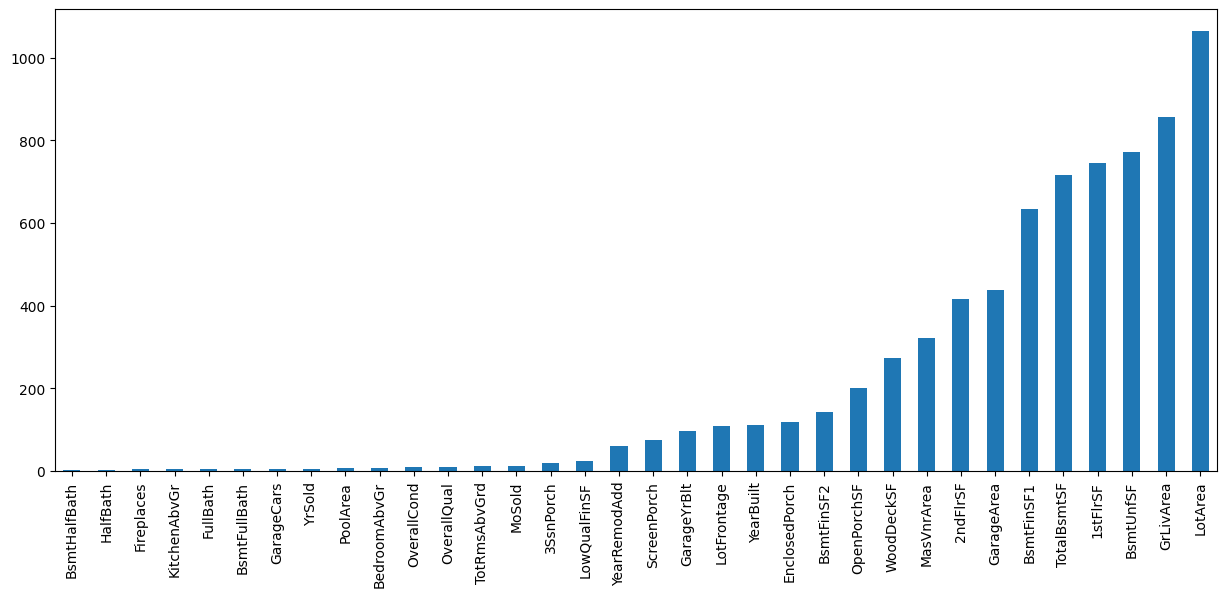

In [350]:
# 정수형 데이터의 중복을 제외한 희귀값의 갯수 시각화
fig = pd.Series([len(df_train[i].value_counts()) for i in feats_n], feats_n).sort_values().plot.bar(figsize=(15,6))

In [351]:
# 범주형 변수 중 순서가 있는 변수는
feats_c_r =['LotShape', 'LandSlope', 'Neighborhood', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'SaleCondition']
# 범주형 변수 중 순서가 없는 변수는
feats_c_nr = [i for i in feats_c if i not in feats_c_r]


print("The Number of feature (Total) : ", len(feats))
print("The Number of feature (Numerical) : ", len(feats_n))
print("The Number of feature (Categorical with rank) : ", len(feats_c_nr))
print("The Number of feature (Categorical without rank) : ", len(feats_c_r))

The Number of feature (Total) :  75
The Number of feature (Numerical) :  34
The Number of feature (Categorical with rank) :  23
The Number of feature (Categorical without rank) :  18


- 범주형 데이터의 분리\
범주형 데이터는 순위가 있는지의 여부에 따라 순서형과 명목형으로 분리하여야 합니다.
차후 가변수화 진행과정에서 처리방법이 달라지기 때문입니다
- 방법은 수작업으로 진행합니다.
- 결과적으로 설명변수의 갯수는 79개 (정수형 24개, 연속형 11개, 범주형 44개 (순서가 없는 범주형 변수 26개, 순서가 있는 범주형 변수 18개))


- 가변수화

- 회귀분석을 진행하기 위해서 범주형 변수에 대해서 가변수화를 진행해야 합니다.
- 차후 EDA를 진행할 때 seaborn을 이용하여 plot을 하게 되면 알파벳 순서대로 그래프가 그려집니다.
이 때 각 범주별로 SalePrice에 대한 중위값을 기준으로 정렬하기 위해서
- 명목형 범주에는 SalePrice 기준 중위값이 낮은 순서대로 A.B.C, 순서형 범주는 1,2,3을 클래스 앞에 이름붙이고 정렬하도록 하겠습니다.
- 이는 sklearn의 OrdinalEncoder 데이터프레임에서 이름이 빠르게 등장하는 순서대로 가변수를 진행하는 것을 고려하더라도 유용한 절차입니다.

In [352]:
# 카테고리의 갯수에 해당하는 알파벳 리스트를 반환해주는
# 제너레이터

def generate_alphabet_list(a):
    alphabet_list = []
    start_char = ord('A')  # 'A'의 ASCII 코드

    for i in range(len(a)):
        if start_char > ord('Z'):
            start_char = ord('A')  # 'Z'를 넘어가면 다시 'A'부터 시작
        alphabet_list.append(chr(start_char))
        start_char += 1  # 다음 알파벳으로 이동

    return alphabet_list

# 예제 리스트 'a'를 생성하고 함수를 호출하여 알파벳 리스트를 만듭니다.
a = range(10)
result = generate_alphabet_list(a)
print(result)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


In [353]:
## 처리4 : 가변수화
#
#def encoder(df) :
#    df = df.copy()
#    dummies = pd.get_dummies(df[feats_c_nr].astype("str"), drop_first=True) # int dtype중 categorical variable 로 넘어간 변수 때문에 astype 수정 필요.
#    df.drop(feats_c_nr, inplace=True, axis=1)
#    print("Number of Columns (df) : ", len(df.columns))
#    print("Number of Columns (dummies): ", len(dummies.columns))
#
#    encoder = OrdinalEncoder()
#    rank_variables = encoder.fit_transform(df[feats_c_r])
#    rank_variables = pd.DataFrame(rank_variables,  columns=feats_c_r, index=df.index)
#    df.drop(feats_c_r, axis=1, inplace=True)
#
#    df_encoded = pd.concat([df,dummies,rank_variables], axis=1)
#    df_encoded
#
#    print("The Number of Total features", len(feats))
#    print("The Number of Numerical", len(feats_n))
#    print("The Number of Categorical without rank", len(feats_c_nr))
#    print("The Number of Categorical with rank", len(feats_c_r))
#
#    print("The Number of Dummies", len(dummies.columns))
#
#    return df_encoded
#
#fron = encoder(fron)
#fron

- 결측치처리

결측치는 무작위 결측치와 비무작위 결측치로 구분된다.\
비무작위 결측치는 동일 시설물에 대한 다른 칼럼으로부터 정보를 얻어 수작업으로 채운다.
대표적인 이유 중 하나는 데이터 원천인 캐글에 의하면 해당 시설물 미보유 시 해당 값이 결측되어 있기 때문이다.
Basement, Kitchen, FirePlace, Garage, POrch, Pool, Lot의 경우 각 시설물에 해당하는 수치데이터를 이용하여 미보유시 "unowned"로 채운다.

무작위 결측치는 KNN 알고리즘을 활용하여 채운다.\
평균 또는 중위값 등을 이용하여 채울 경우 편향이 발생할 우려가 높기 때문이다.\

결측치가 너무 많을 경우 해당 변수 또는 레코드를 제거하는 것을 고려할 수 있다.\

결측치 처리를 진행하기 전에 sklearn의 패키지를 활용하기 위해서 범주변수에 대한 가변수화가 요구된다.
특징은, 명목형 범주변수에 대해서도 Ordinal을 적용한다는 점인데, OneHotEncoding을 진행하게 되면은 KNNImputer를 적용하기에 어려움이 따르기 때문이다.

In [354]:
# 수영장 보유여부로 수정
#df_train[df_train["PoolArea"]>0]["PoolArea"]=1
#
## object dtype을 category dtype으로 수정 ()
#for c in feats_c :
#  df_train[c] = df_train[c].astype('object')


#"YearBuilt", "YearRemodAdd","MoSold", "YrSold"


# 추가적으로, 
# poolarea의 경우, 1) 풀 보유 부동산의 수가 적고 2) 부동산 별 보유한 면적이 유사하여 보유 여부로 변경
# miscval : 자료수입 근거를 확인할 수 없어서 제거
# MoSold, YrSold, YearBuilt, YearRemoAdd 등 통합 및 2000,2001의 숫자가 아니라 0 1 2 3 4 정도의 숫자를 가지도록 조정되어야 함. 
  # (가장 이른 거래된 물건과 n년차의 차이를 가짐을 분명히 하기 위해서. 2000->2001과 0->1은 다른가?)
  # 하려고 하였으나 scaling 과정에서 어짜피 바뀔것이기 때문에 그대로 둠.

  # 결과적으로, 설명변수의 갯수는 79개 (정수형 24개, 연속형 11개, 범주형 44개)


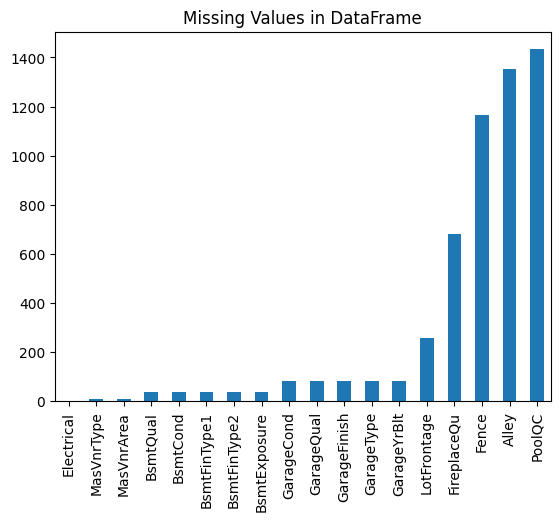

In [355]:
# 결측치 갯수 시각화
with_na = df_train.isna().sum()
with_na = with_na[with_na>0].sort_values()
with_na.plot.bar()
plt.title('Missing Values in DataFrame')
plt.show()

In [356]:
# Basement, Kitchen, FirePlace, Garage, POrch, Pool의

# 처리3 : 참조할 변수가 있는 칼럼 수동으로 채우기
def manual_imputer(df) :  

    df = df.copy()
    # 수동입력 대상과 참조 변수 (동일 시설물에 대한 수량형 데이터)
    manual_imputer = ["Bsmt", "Kitchen", "FirePlace", "Garage", "Porch", "Pool", "Lot"]
    manual_filling_reference = ["TotalBsmtSF", "KitchenAbvGr","Fireplaces","GarageArea", "OpenPorchSF", "PoolArea", "LotArea"]

    for keyword, reference in zip(manual_imputer, manual_filling_reference) :

        idx = df[df[reference]==0].index
        temp_c = [i for i in feats_c if keyword in i]
        df.loc[idx,temp_c]=df.loc[idx,temp_c].fillna("Unowned")

    return df

# 처리4 : 부동산매도가격 중위값 기준 카테고리 넘버링
def numbering(df) :     
    df = df.copy()
    for cl in feats_c_nr+feats_c_r :
        temp = df[[cl , "SalePrice"]].groupby(by=cl).median().sort_values(by="SalePrice", ascending=True)
        for i, j in zip(temp.index, generate_alphabet_list(temp.index)) :    
            df[cl].replace(i,f"{j}. {i}", inplace=True) 
    return df

## 처리 5 : KNNImputer
def auto_imputer(df) :

    df = df.copy() 
    # 가변수화
    encoder = OrdinalEncoder()
    df[feats_c] = encoder.fit_transform(df[feats_c])

    # KNNImputer
    imputer = KNNImputer()
    df_encoded = imputer.fit_transform(df)
    df_encoded = pd.DataFrame(df_encoded, columns=df.columns, index=df.index)

    # 범주형 변수의 경우 정수로 반올림
    df_encoded[feats_c] = df_encoded[feats_c].applymap(lambda x : round(x,0))
    
    return df_encoded

In [357]:
## 처리5 : 참조변수 없는 경우 KNNImputer
#def auto_imputer_tester(df) :
#
#    df = df.copy()
#
#    dummies = pd.get_dummies(df[feats_c_nr], drop_first=True) # int dtype중 categorical variable 로 넘어간 변수 때문에 astype 수정 필요.
#    df.drop(feats_c_nr, inplace=True, axis=1)
#    print("Number of Columns (df) : ", len(df.columns))
#    print("Number of Columns (dummies): ", len(dummies.columns))
#
#    encoder = OrdinalEncoder()
#    rank_variables = encoder.fit_transform(df[feats_c_r])
#    rank_variables = pd.DataFrame(rank_variables,  columns=feats_c_r, index=df.index)
#    df.drop(feats_c_r, axis=1, inplace=True)
#
#    df_encoded = pd.concat([df,dummies,rank_variables], axis=1)
#
#    print("The Number of Total features", len(feats))
#    print("The Number of Numerical", len(feats_n))
#    print("The Number of Categorical without rank", len(feats_c_nr))
#    print("The Number of Categorical with rank", len(feats_c_r))
#
#    print("The Number of Dummies", len(dummies.columns))
#
#
#    imputer = KNNImputer()
#    df_encoded_filled = imputer.fit_transform(df_encoded)
#    df_encoded_filled = pd.DataFrame(df_encoded, columns=df_encoded.columns, index=df_encoded.index)
#    
#    # 범주형 변수의 경우 정수형태로 변환
#    #df_encoded_filled[feats_c] = df_encoded_filled[feats_c].applymap(lambda x : round(x,0))
#    
#
#    return df_encoded_filled


In [358]:
#처리 3,4,5 적용
df_train = manual_imputer(df_train)
df_train = numbering(df_train)
df_train_encoded = auto_imputer(df_train)

###  누락값 재확인
print("Still have a Missing Value : ", df_train_encoded.isna().any().any())

Still have a Missing Value :  False


In [359]:
df_train['SalePrice'].isna().any()

False

In [360]:
# 처리 3,4,5 pipeline에 추가
pipeline += [manual_imputer,numbering ,auto_imputer]

1. [[데이터분할]] \
    - 교차검정데이터세트 분할\
    - 임의성 및 [[대표성]] 확인\
    - [[클래스불균형]] 확인

In [361]:
criterion = int(len(df_train) * 0.8)
print('size of train sample : ', criterion)
print('size of cv sample : ', len(df_train)-criterion)

# 원자료 분할
df_cv = df_train.iloc[criterion:,:].copy()
df_train = df_train.iloc[:criterion, :].copy()

# 가변수화 진행샘플 분할
df_cv_encoded = df_train_encoded.iloc[criterion:,:].copy()
df_train_encoded = df_train_encoded.iloc[:criterion, :].copy()


size of train sample :  1152
size of cv sample :  288


In [362]:
df_train_encoded['SalePrice']

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
1165    194000.0
1166    233170.0
1167    245350.0
1168    173000.0
1169    235000.0
Name: SalePrice, Length: 1152, dtype: float64

- 클래스불균형 확인

1. 설명력을 가지는 독립변수에 대해서 클래스별로 샘플의 숫자가 크게 차이날 경우, 레코드가 많은 집단의 특성이 높은 가중치를 가지고 학습되는 현상이 발생할 수 있다.\
2. 훈련샘플과 교차검증세트 분리 전후의 클래스별 비율이 차이가 나는 경우 훈련샘플이 수집된 표본에 대한 대표성을 상실하고 선택편향을 일으켜 모델성능이 저하될 수 있다.
3. 과도하게 편향되어 있기 때문에 이를 고려하여 샘플의 95%를 포함하는 범위 내에서 클래스 불균형을 따진다.
- 해당 내용은 이후 특이값이 영향값에 대한 고려 또한 필요하다는 의미이다.
4. 분석결과 test sample까지 합한 전체 표본의 비율과 훈련샘플의 비율이 크게 차이나지 않는다. 샘플링편향에 대한 고민은 없다.

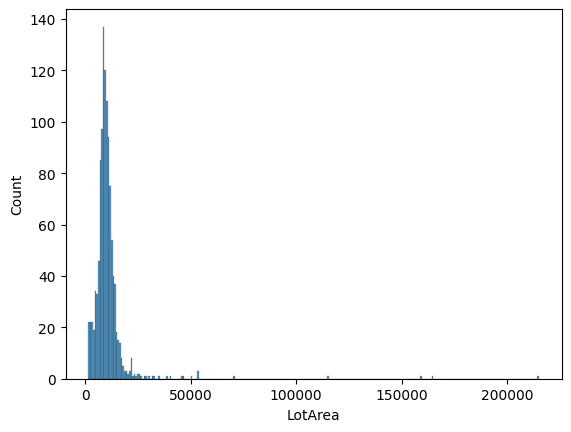

In [363]:
fig = sns.histplot(df_train["LotArea"])

In [364]:
z = 1.96 # 95% 유의수준
mu = df_train["LotArea"].mean()
std = df_train["LotArea"].std()

upper = z * std + mu
lower = max(-z * std + mu, 0)

print("upper : ", upper)
print("lower : ", lower)

num_bins = 5


def class_imbalance(df, num_bins, variable) :

    df = df.copy()

    bins = [lower] + sorted([upper/i for i in range(1, 1+num_bins)]) + [np.inf]
    df[f"{variable}_cat"] = pd.cut(df[f"{variable}"], bins, labels=range(len(bins)-1))
    res = df[f"{variable}_cat"].value_counts()/len(df)

    return res

original = pd.concat([df_train, df_cv, df_test], axis=0)
 

agg = []
for i in [original, df_train] :
    agg += [class_imbalance(i, num_bins, "LotArea")]

pd.DataFrame(agg, index=["original", "train_set"]).T.sort_index()

upper :  31599.36862264361
lower :  0


original  train_set
0  0.168679   0.161458
1  0.125905   0.125868
2  0.354260   0.356771
3  0.281821   0.289062
4  0.057951   0.052951
5  0.011383   0.013889

In [365]:
# corr = df_train_encoded.corr()["SalePrice"]
# corr = corr.sort_values()
# plt.figure(figsize=(6,13))
# plt.barh(corr.index,corr)
# x=plt.xticks(rotation=90)

In [366]:
# for cl in feats_c_r :
#     temp = df_totalcl, "SalePrice".groupby(by=cl).median().sort_values(by="SalePrice", ascending=True)
#     for i, j in zip(temp.index, range(1,len(temp)+1)) :    df_total[cl].replace(i,f"{j}. {i}", inplace=True) 
# df_total.head(5)

#for cl in feats_c_nr :
#    temp = df_totalcl, "SalePrice".groupby(by=cl).median().sort_values(by="SalePrice", ascending=True)
#    for i, j in zip(temp.index, generate_alphabet_list(temp.index)) :    df_total[cl].replace(i,f"{j}. {i}", inplace=True) 
#
#df_total.head(5)

- 데이터 분리 (임의성 및 대표성 확보)

<span style="font-size: 13px;"> 훈련샘플과 테스트샘플의 분리는 이미 kaggle에 의해서 수행되어 있음. 분리된 샘플의 임의성에 대해서 테스트 수행.</span>

In [367]:
#### 평균과 분산 계산
#_mean = [int(df_train["SalePrice"].mean()), int(y_test.mean()[0])]
#_std = [int(df_train["SalePrice"].std()), int(y_test.std()[0])]
#
#display(pd.DataFrame(np.array([_mean, _std]).T, columns=["mean", "std"], index=["Train", "Test"]).applymap('${:,.0f}'.format))
#
#
#fig, axs = plt.subplots(2,2, figsize=(10,9))
#
#### 시각화
#
## 원자료 
#sns.distplot(df_train["SalePrice"], ax=axs[0,0])
#sns.distplot(y_test, ax=axs[0,1])
#
## log변환 plot
#sns.distplot(np.log(df_train["SalePrice"]), ax=axs[1,0])
#sns.distplot(np.log(y_test), ax=axs[1,1])
#
## figure setting
#axs[0,0].set_title("TRAIN SET")
#axs[0,0].set_xlabel("")
#
#axs[0,1].set_title("TEST SET")
#axs[0,1].set_ylabel("")
#
#
#axs[1,0].set_title("TRAIN SET (log scale)" )
#axs[1,1].set_title("TEST SET (log scale)")
#axs[1,1].set_xlabel("SalePrice")
#axs[1,1].set_ylabel("")

In [368]:
## 데이터를 2차원 배열로 변환
#data = np.array([y_test.values.ravel(), df_train["SalePrice"].values[:-1)
#
## 카이제곱 독립성 검정 수행
#chi2, p, dof, expected = chi2_contingency(data)
#
## 결과 출력
#print("카이제곱 통계량 (Chi-Square):", chi2)
#print("p-값 (P-Value):", p)
#print("자유도 (Degrees of Freedom):", dof)
#print("기대값 (Expected Values):")
#print(expected)
#
## 유의수준 0.05에서 가설 검정
#alpha = 0.05
#if p < alpha:
#    print("두 그룹은 서로 다른 분포를 가집니다. (귀무가설 기각)")
#else:
#    print("두 그룹은 동일한 분포를 가집니다. (귀무가설 채택)")


In [369]:
#from scipy.stats import chi2_contingency
#
## 데이터를 2차원 배열로 변환
#data = np.array([np.log(y_test.values.ravel()), np.log(df_train["SalePrice"].values[:-1])])
#
## 카이제곱 독립성 검정 수행
#chi2, p, dof, expected = chi2_contingency(data)
#
## 결과 출력
#print("카이제곱 통계량 (Chi-Square):", chi2)
#print("p-값 (P-Value):", p)
#print("자유도 (Degrees of Freedom):", dof)
#print("기대값 (Expected Values):")
#print(expected)
#
## 유의수준 0.05에서 가설 검정
#alpha = 0.05
#if p < alpha:
#    print("두 그룹은 서로 다른 분포를 가집니다. (귀무가설 기각)")
#else:
#    print("두 그룹은 동일한 분포를 가집니다. (귀무가설 채택)")

In [370]:

#from scipy.stats import chi2_contingency
#
## 데이터를 2차원 배열로 변환
#data = np.array([a, b])
#
## 카이제곱 독립성 검정 수행
#chi2, p, dof, expected = chi2_contingency(data)
#
## 결과 출력
#print("카이제곱 통계량 (Chi-Square):", chi2)
#print("p-값 (P-Value):", p)
#print("자유도 (Degrees of Freedom):", dof)
#print("기대값 (Expected Values):")
#print(expected)
#
## 유의수준 0.05에서 가설 검정
#alpha = 0.05
#if p < alpha:
#    print("두 그룹은 서로 다른 분포를 가집니다. (귀무가설 기각)")
#else:
#    print("두 그룹은 동일한 분포를 가집니다. (귀무가설 채택)")


In [371]:
## 평균차이에 대한 t-test
#
#
## t-검정 수행
#t_statistic, p_value = stats.ttest_ind(df_train["SalePrice"].values, y_test.values.ravel())
#
## 결과 출력
#print("t-statistic:", t_statistic)
#print("p-value:", p_value)
#
## p-value를 이용한 가설 검정
#alpha = 0.05  # 유의수준 설정
#if p_value < alpha:
#    print("귀무 가설 기각: 그룹 간에 평균 차이가 있음")
#else:
#    print("귀무 가설 채택: 그룹 간에 평균 차이가 없음")


In [372]:
## 분산차이에 대한 F-test
#
#
## F-검정 수행
#f_statistic, p_value = stats.f_oneway(df_train["SalePrice"].values, y_test.values.ravel())
#
## 결과 출력
#print("F-statistic:", f_statistic)
#print("p-value:", p_value)
#
## p-value를 이용한 가설 검정
#alpha = 0.05  # 유의수준 설정
#if p_value < alpha:
#    print("귀무 가설 기각: 그룹 간에 평균 차이가 있음")
#else:
#    print("귀무 가설 채택: 그룹 간에 평균 차이가 없음")
#
#
## 원자료형에서는 카이제곱검정을 통과하지 못하였지만, log변환 자료에서는 카이제곱검정을 통과.
## 평균과 분산에서 통계적으로 유의미한 차이가 발견되지 않음.
## 1460번 부동산을 기준으로 훈련샘플과 테스트 샘플이 구분되었지만 임의성에 의해 두 집단이 적절히 분리된 것으로 판단됨.

In [373]:
## 예제 데이터 생성 (정규 분포를 따르지 않는 예시)
#data = np.log(df_train["SalePrice"].values)  # 지수 분포 데이터 생성
#data2 = np.log(y_test.values.ravel())
#
#
## QQ plot 그리기
#
#fig, axs = plt.subplots(1,2,figsize=(10,6))
#
#fron = stats.probplot(data, dist="norm", plot=axs[0])
#fron2 = stats.probplot(data2, dist="norm", plot=axs[1])
#
#
#plt.title("QQ Plot")
#plt.xlabel("Theoretical Quantiles")
#plt.ylabel("Sample Quantiles")
#plt.show()
#
#
## 약간 벗어나는 값들이 존재하는 것을 확인할 수 있음.
## 약간 오른쪽으로 기울어져 skewed되어 있는 꼴임을 확인할 수 있다.

In [374]:
## 꽤나 심각한 문제가 있음을 알 수 있다 SalePrice 기준으로 분류를 확인해봤을때. 이럴 경우 회귀분석의 정확도가 떨어질 수가 있다.
#
#_max = pd.concat([df_train, y_test])["SalePrice"].max()
#_min = pd.concat([df_train, y_test])["SalePrice"].min()
#_range = _max-_min
#
#_total = pd.cut(pd.concat([df_train, y_test])["SalePrice"], bins=[ _range/i for i in [5,4,3,2,1,1e-10, labels=list(range(1,6)))
#_train = pd.cut(df_train["SalePrice"], bins=[ _range/i for i in [5,4,3,2,1,1e-10, labels=list(range(1,6)))
#_test = pd.cut(y_test["SalePrice"], bins=[ _range/i for i in [5,4,3,2,1,1e-10, labels=list(range(1,6)))
#
#p_total = _total.value_counts() / len(_total)
#p_train = _train.value_counts() /len(_train)
#p_test = _test.value_counts() / len(_test)
#
#proportionate = pd.concat([p_total,p_train,p_test],axis=1)
#proportionate.columns = ["total","train","test"]
#
#def format_pct(data) :
#    return f"{data:.2%}"
#
#proportionate.applymap(format_pct)
#
#

# 3단계 : 탐색적 데이터 탐색(Exploring Data Analysis)


1. 일변량 데이터(X, y) 탐색    
    - 기술적 통계량 : 평균, 변이
    - 히스토그램과 확률분포 
    - 종속변수(y) 정규성 테스트    
        

2. 2변량 데이터(X~X, y~X) 탐색
    - (피어슨, 스피어만) 상관계수 분석     
    - 비선형성 파악 : 잔차그림
    - 이상치, 영향값, 고레버리지 값 : 버블그림
    - 히스토그램과 확률분포 : 박스그림,바이올린 그림(범주형), 박스형 그림, 결합분포 
    - y~X : 결합 독립성 테스트 
    

## 1-1) 일변량 데이터(y) 탐색

1. 평균값에 비해 중간값이 작은 것으로 미루어, 오른쪽으로 긴꼬리를 조금 더 긴꼬리를 가진 것으로 보인다. : log스케일 변환
1. 10분위의 구분선들이 밀집되어 있는 것으로 미루어, 이상치의 크기가 매우 크다는 것을 알 수 있다.
3. 특이값이 있다는 것도 알 수 있다. 특이값에 대해서는 모델추정간 95% 범위 밖 데이터에 대해서 절사하도록 하겠다.
4. 오른쪽 꼬리가 fatter하고 치우쳐 져있다는 것을 QQ-plot으로 알 수 있다.

- 분포확인 및 기술통계량 측정

Mean : $181,062 
Median : $163,700 
Standard Deviation : $79,075 
Max : $755,000 
Min : $34,900 
Decile(d1) : $106,000 
Decile(d2) : $124,000 
Decile(d3) : $135,500 
Decile(d4) : $147,640 
Decile(d5) : $163,700 
Decile(d6) : $179,615 
Decile(d7) : $200,000 
Decile(d8) : $230,000 
Decile(d9) : $279,350 
Decile(d10) : $755,000 


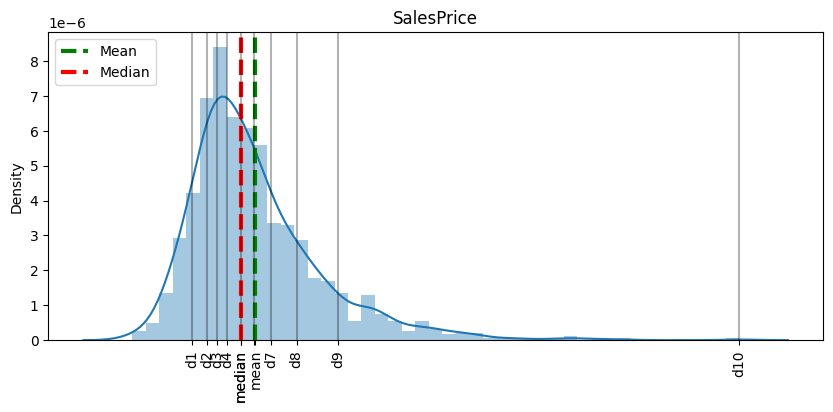

In [375]:
### 평균과 분산, 백분위수 계산
_mean = int(df_train["SalePrice"].mean())
_median =  int(df_train["SalePrice"].median())
_std = int(df_train["SalePrice"].std())
_min = int(df_train["SalePrice"].min())
_max = int(df_train["SalePrice"].max())


### 평균과 분산, 백분위수 출력
print(f"Mean : ${_mean:,.0f} ")
print(f"Median : ${_median:,.0f} ")
print(f"Standard Deviation : ${_std:,.0f} ")
print(f"Max : ${_max:,.0f} ")
print(f"Min : ${_min:,.0f} ")

plt.figure(figsize=(10,4))
sns.distplot(df_train["SalePrice"])
plt.axvline(_mean, color='green', linestyle='--', linewidth=3, label="Mean")
plt.axvline(_median, color='red', linestyle='--', linewidth=3, label='Median')
plt.tick_params(axis='x', labelrotation=90)
plt.title("SalesPrice")
plt.xlabel("")
plt.legend()

ticks = []

for i in range(10) :
    i += 1
    j = i/10
    d = df_train['SalePrice'].quantile(j)   
    ticks+=[d]
    print(f"Decile(d{i}) : ${d:,.0f} ")
    plt.axvline(d, color='black', linestyle='-', alpha=0.3)

plt.xticks([_mean,_median, *ticks], labels=["mean","","d1","d2","d3","d4","median","","d7","d8","d9","d10"])
plt.show()


- 정규분포 확인

Text(0, 0.5, '')

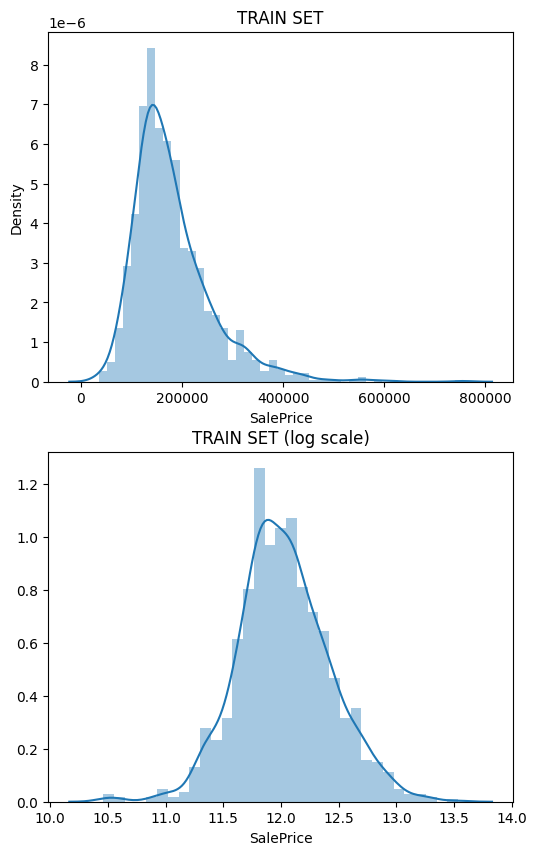

In [376]:
fig, axs = plt.subplots(2,1, figsize=(6,10))

### 시각화

# 원자료 
sns.distplot(df_train["SalePrice"], ax=axs[0])

# log변환 plot
sns.distplot(np.log(df_train["SalePrice"]), ax=axs[1])

# figure setting
axs[0].set_title("TRAIN SET")
axs[1].set_title("TRAIN SET (log scale)" )
axs[1].set_xlabel("SalePrice")
axs[1].set_ylabel("")

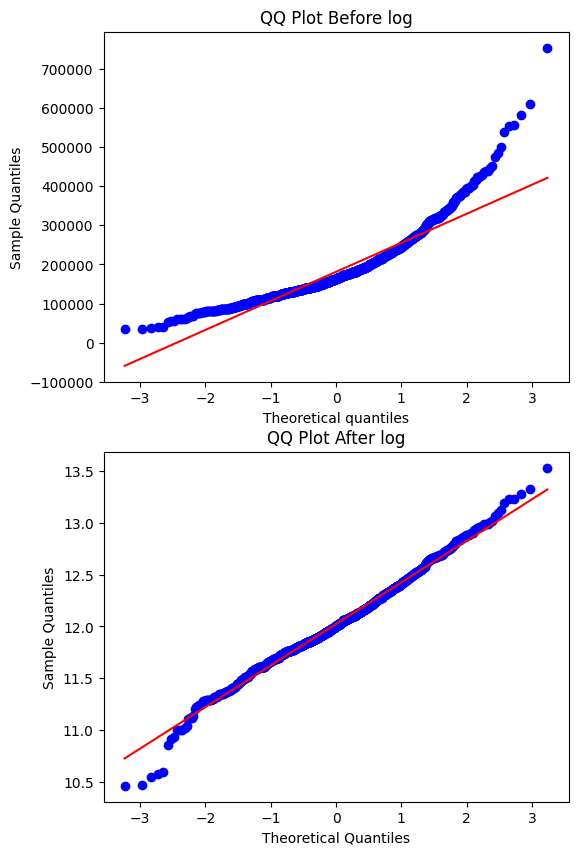

In [377]:
# QQ plot

# 예제 데이터 생성 (정규 분포를 따르지 않는 예시)
#data = np.log(df_train["SalePrice"].values)  # 지수 분포 데이터 생성



# QQ plot 그리기
fig, axs = plt.subplots(2,1,figsize=(6,10))
f1 = stats.probplot(df_train["SalePrice"].values, dist="norm", plot=axs[0])
f2 = stats.probplot(np.log(df_train["SalePrice"].values), dist="norm", plot=axs[1])
axs[0].set_title("QQ Plot Before log")
axs[1].set_title("QQ Plot After log")
axs[1].set_xlabel("Theoretical Quantiles")
axs[0].set_ylabel("Sample Quantiles")
axs[1].set_ylabel("Sample Quantiles")
plt.show()


# 약간 벗어나는 값들이 존재하는 것을 확인할 수 있음.
# 약간 오른쪽으로 기울어져 skewed되어 있는 꼴임을 확인할 수 있다.

In [378]:
# 처리 6 : 종속변수 y log 스케일화
 
def y_log(df, df_encoded) :
    df = df.copy()
    df_encoded = df_encoded.copy()

    df["SalePrice"] = np.log(df["SalePrice"])
    df_encoded["SalePrice"] = np.log(df_encoded["SalePrice"])

    return df, df_encoded

df_train, df_train_encoded = y_log(df_train, df_train_encoded)

pipeline += [y_log]
pipeline_for_cv = [y_log]

## 1-2) 일변량 데이터(X) 탐색


<span style="color:yellow">훈련샘플과 테스트샘플의 분포가 조금 다르다고 생각되지는 않는지?</span><br>

<span style="color:yellow">정규분포를 따르지 않는 것으로 보이는게 회귀분석에서 왜 중요한지?</span><br>

- Numerical 변수 : 분포확인 및 기술통계량 측정

1. 값 '0'을 가지는 레코드가 굉장히 많다 : 시설물 보유여부를 가지는 변수를 포함할 예정
- 대상 : 'Basement', 'Garage', '2ndFloor', 'MasVnr', 'WoodDeck', 'Porch', 'Pool'
2. 대부분 오른쪽으로 두꺼운 꼬리를 가지고 있다. : 로그스케일 변환 필요
- 대상 : 'GrLivArea','1stFlrSF','2ndFlrSF','TotalBsmtSF','LotArea','LotFrontage','KitchenAbvGr','GarageArea', 'BsmtUnfSF', 'TotalBsmtSF'


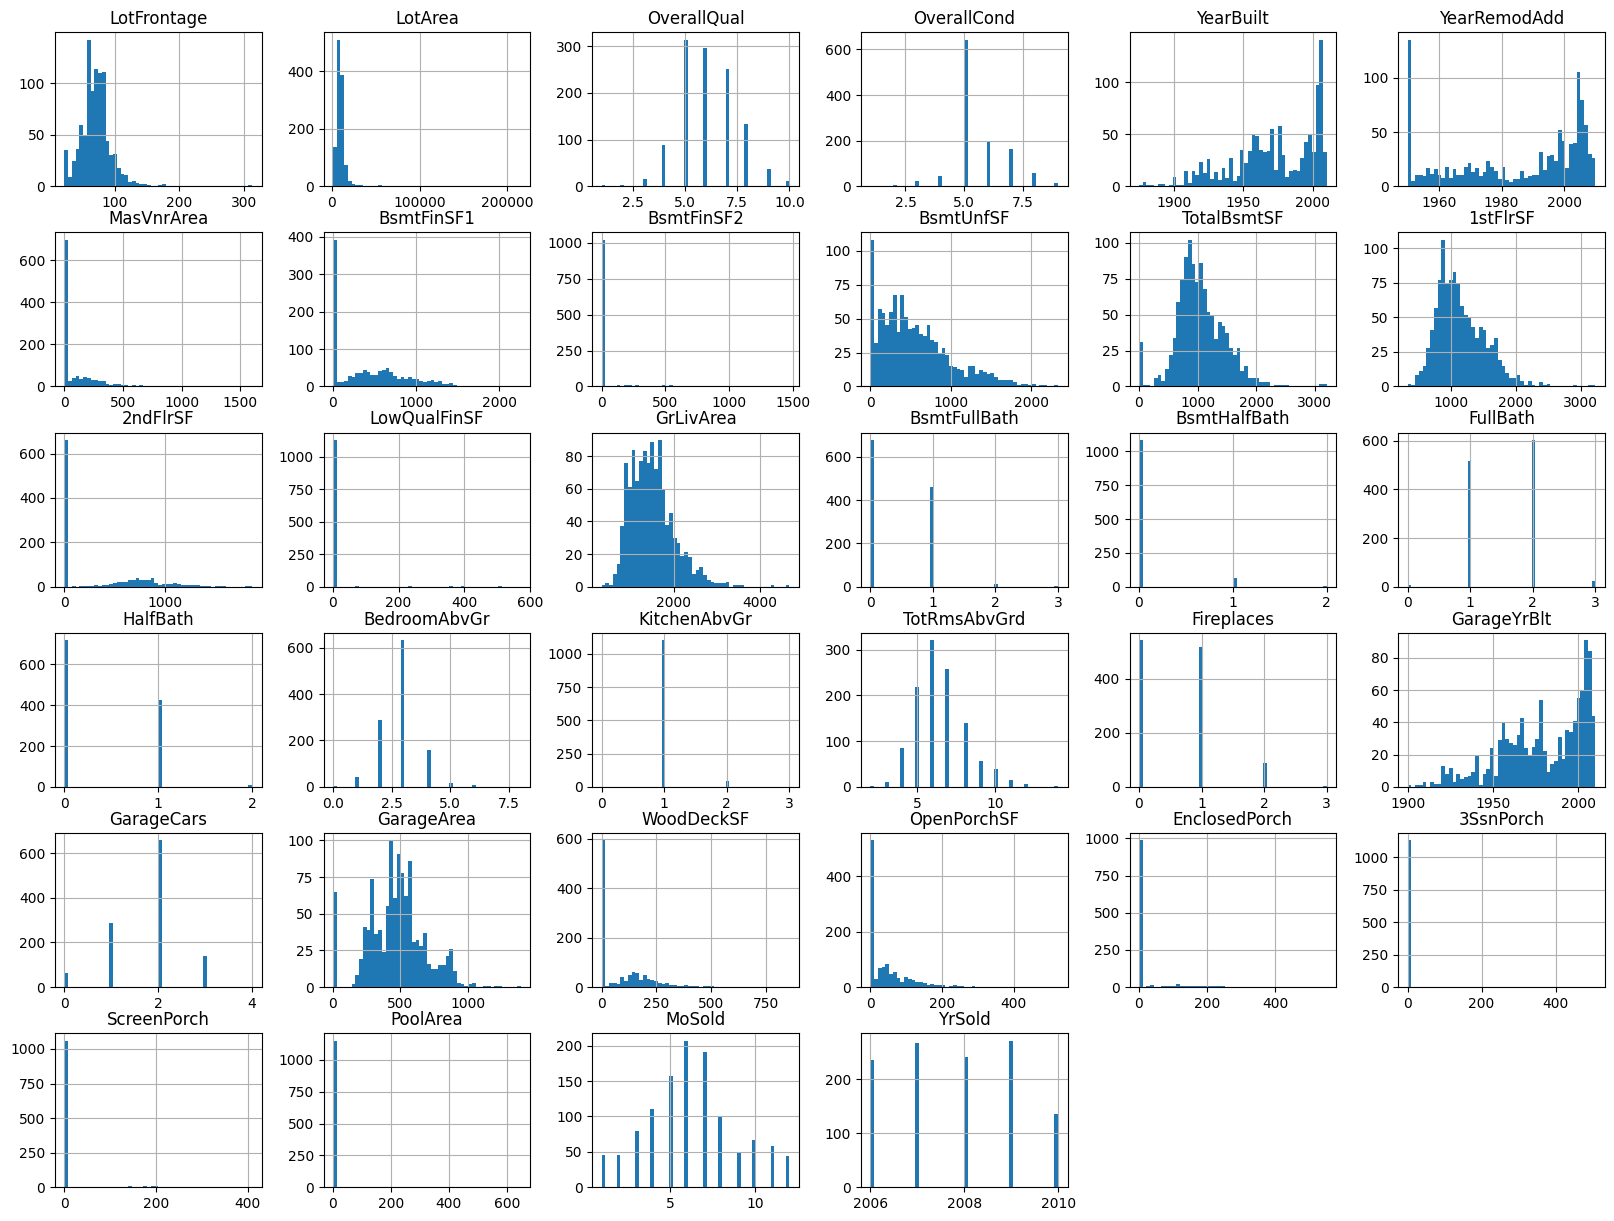

In [379]:
# 분포확인
df_train[feats_n].hist(bins=50, figsize=(20,15), )
plt.show()

In [380]:
# 기술통계량
df_train[feats_n].describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count   948.000000    1152.000000  1152.000000  1152.000000  1152.000000   
mean     69.930380   10538.545139     6.104167     5.572917  1971.486979   
std      23.326148   10745.318104     1.381113     1.124668    30.018700   
min      21.000000    1300.000000     1.000000     1.000000  1875.000000   
25%      59.000000    7555.000000     5.000000     5.000000  1954.000000   
50%      70.000000    9423.000000     6.000000     5.000000  1973.000000   
75%      80.000000   11616.000000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1152.000000  1146.000000  1152.000000  1152.000000  1152.000000  ...   
mean    1985.115451   103.835951   441.764757    46.738715   563.137153  ...   
std       20.511353   181.405534   433.719782   161.464401   442.254522  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   222.250000  ...   
50%     1994.000000     0.000000   384.000000     0.000000   467.500000  ...   
75%     2004.000000   167.750000   709.000000     0.000000   797.250000  ...   
max     2010.000000  1600.000000  2260.000000  1474.000000  2336.000000  ...   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1152.000000  1152.000000  1152.000000  1152.000000    1152.000000   
mean      1.763021   472.938368    94.778646    46.428819      21.767361   
std       0.740010   211.309497   123.797727    65.743811      60.810866   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   336.000000     0.000000     0.000000       0.000000   
50%       2.000000   478.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.250000       0.000000   
max       4.000000  1390.000000   857.000000   523.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MoSold       YrSold  
count  1152.000000  1152.000000  1152.000000  1152.000000  1152.000000  
mean      3.672743    14.993924     1.006944     6.289931  2007.830729  
std      30.282878    54.599457    24.321906     2.671594     1.316207  
min       0.000000     0.000000     0.000000     1.000000  2006.000000  
25%       0.000000     0.000000     0.000000     5.000000  2007.000000  
50%       0.000000     0.000000     0.000000     6.000000  2008.000000  
75%       0.000000     0.000000     0.000000     8.000000  2009.000000  
max     508.000000   410.000000   648.000000    12.000000  2010.000000  

[8 rows x 34 columns]

- Categorical 변수 : 분포확인 및 기술통계량 측정

1. 일부 변수는 하나의 클래스가 압도적인 경우가 있다. 이 경우 클래스 불균형이 발생할 수 있다. (희소정보)
2. 수치형 자료와 동일하게 시설물을 가지고 있지 않은 경우 결측치 (unowned로 대체)가 많이 발생한다. : 미보유 변수 추가 예정

In [381]:
# 각 범주별 클래스
cats = pd.DataFrame([df_train[cl].sort_values().unique() for cl in feats_c], index=feats_c).fillna("").T
cats

MSZoning   Street    Alley LotShape LandContour   LotConfig LandSlope  \
0   A. C (all)  A. Grvl  A. Grvl   A. Reg      A. Bnk   A. Inside    A. Gtl   
1        B. RM  B. Pave  B. Pave   B. IR1      B. Lvl   B. Corner    B. Mod   
2        C. RH                     C. IR3      C. Low      C. FR2    C. Sev   
3        D. RL                     D. IR2      D. HLS      D. FR3             
4        E. FV                                         E. CulDSac             
5                                                                             
6                                                                             
7                                                                             
8                                                                             
9                                                                             
10                                                                            
11                                                                            
12                                                                            
13                                                                            
14                                                                            
15                                                                            
16                                                                            
17                                                                            
18                                                                            
19                                                                            
20                                                                            
21                                                                            
22                                                                            
23                                                                            
24                                                                            

   Neighborhood Condition1 Condition2  ... FireplaceQu  GarageType  \
0    A. MeadowV  A. Artery    A. RRNn  ...       A. Po  A. Unowned   
1     B. IDOTRR   B. Feedr  B. Artery  ...       B. Fa  B. CarPort   
2     C. BrDale    C. RRAe   C. Feedr  ...       C. TA   C. Detchd   
3    D. OldTown    D. Norm    D. RRAn  ...       D. Gd  D. Basment   
4    E. BrkSide    E. RRAn    E. Norm  ...       E. Ex   E. 2Types   
5    F. Edwards    F. RRNe    G. PosN  ...               F. Attchd   
6     G. Sawyer    G. PosN    H. PosA  ...              G. BuiltIn   
7    H. Blueste    H. PosA             ...                           
8      I. SWISU    I. RRNn             ...                           
9      J. NAmes                        ...                           
10   K. NPkVill                        ...                           
11   L. Mitchel                        ...                           
12   M. SawyerW                        ...                           
13   N. Gilbert                        ...                           
14    O. NWAmes                        ...                           
15   P. Blmngtn                        ...                           
16   Q. CollgCr                        ...                           
17   R. ClearCr                        ...                           
18   S. Crawfor                        ...                           
19   T. Veenker                        ...                           
20   U. Somerst                        ...                           
21    V. Timber                        ...                           
22   W. StoneBr                        ...                           
23   X. NoRidge                        ...                           
24   Y. NridgHt                        ...                           

   GarageFinish  GarageQual  GarageCond PavedDrive      PoolQC     Fence  \
0    A. Unowned       A. Po  A. Unowned       A. N  A.

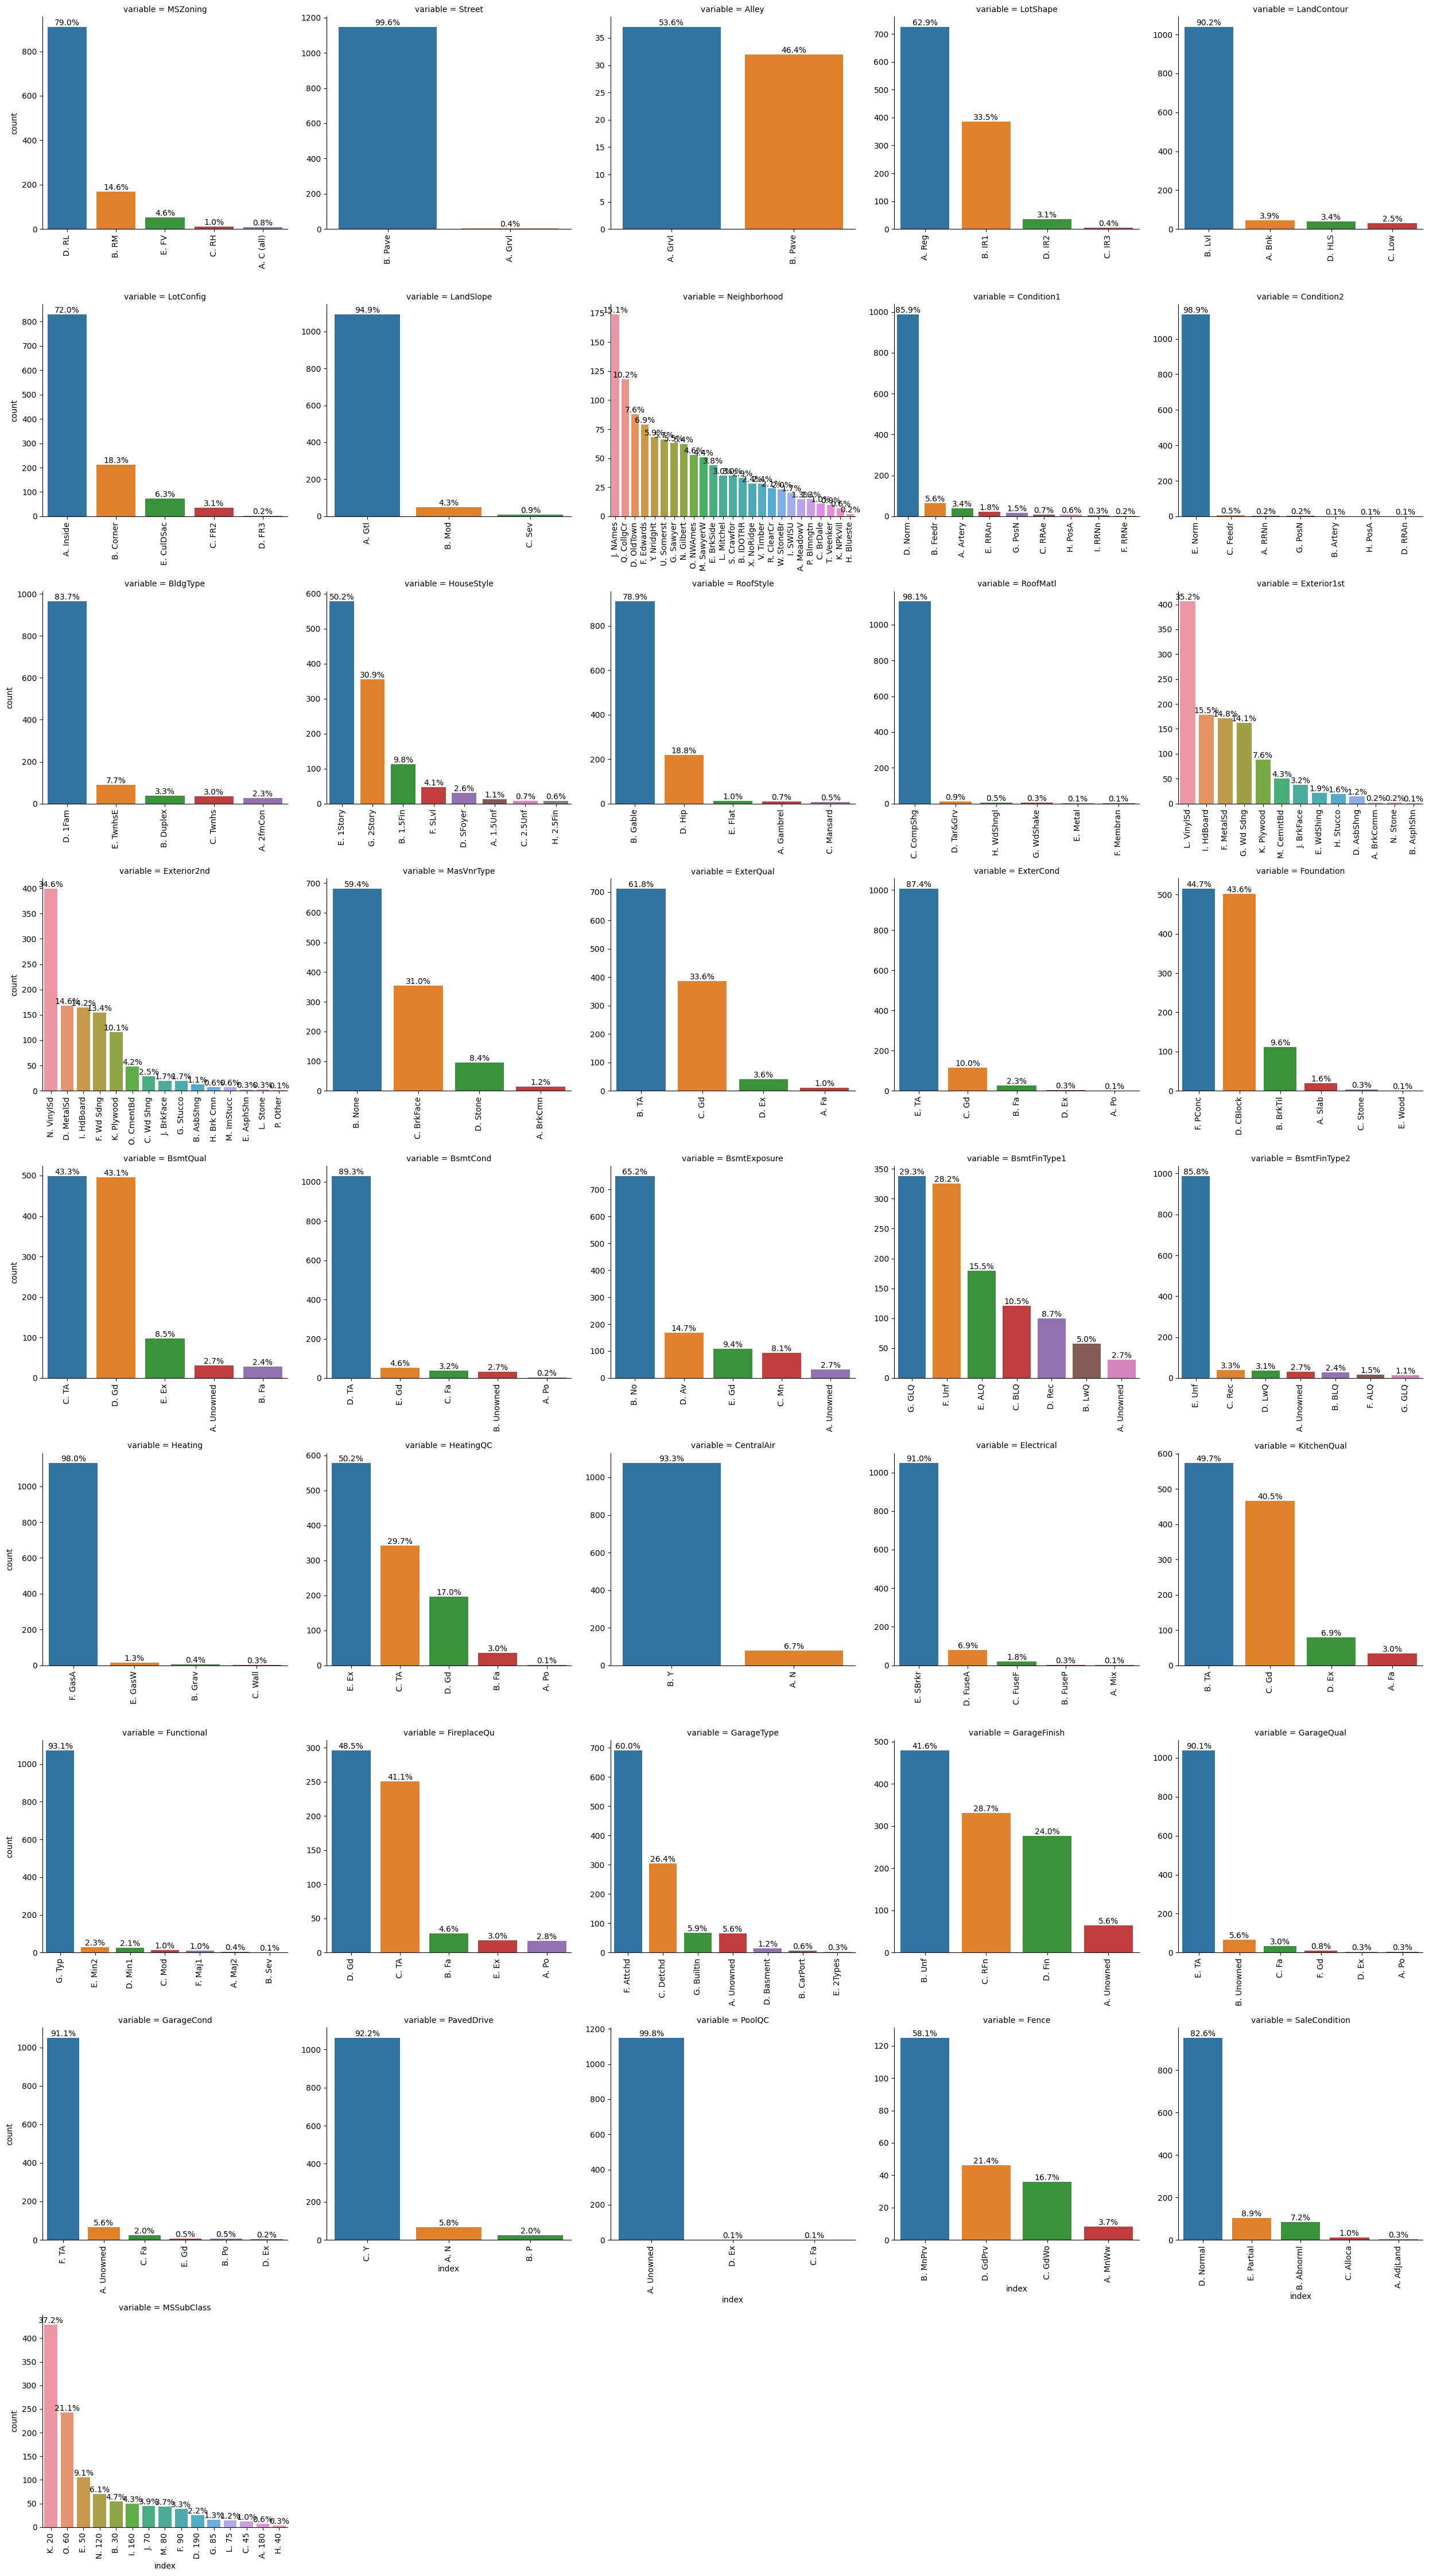

In [382]:
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=feats_c)
f.drop("SalePrice", inplace=True, axis=1)

sub_dfs = []

for i in feats_c :
    fron = pd.DataFrame(df_train[i].value_counts())
    fron.columns = ["count"]
    fron["variable"] = [i]*len(fron)
    sub_dfs.append(fron)

f = pd.concat(sub_dfs)
f.reset_index(inplace=True)

def barplot(x,y, **kwargs) :
    fig = sns.barplot(x,y)
    x = plt.xticks(rotation=90)
    for p in fig.patches :
        height = p.get_height()
        pct = p.get_height() / np.sum(y)*100
        _text = plt.annotate(f'{pct:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False, size=5)
g = g.map(barplot,"index","count")

## 2-1) Numerical 변수 확인 (X~X)

- 상관계수

1. 독립변수간에는 상관관계를 가지지 않는 것이 회귀식의 가정\
위반시 다중공선성 문제를 야기\
해당 변수들은 : 상호관계항을 생성

대상 : ['Neighborhood_E:OverallQual', 'MSSubClass:BldgType_E', 'ExterQual_E:OverallQual', 'PoolArea:PoolQC_E', 'Fireplaces:FireplaceQu_E',
          'OverallQual:KitchenQual_E', 'GarageQual_E:GarageCond','GarageArea:GarageCars', '1stFlrSF:TotalBsmtSF', 
          'TotRmsAbvGrd:GrLivArea']

<Axes: >

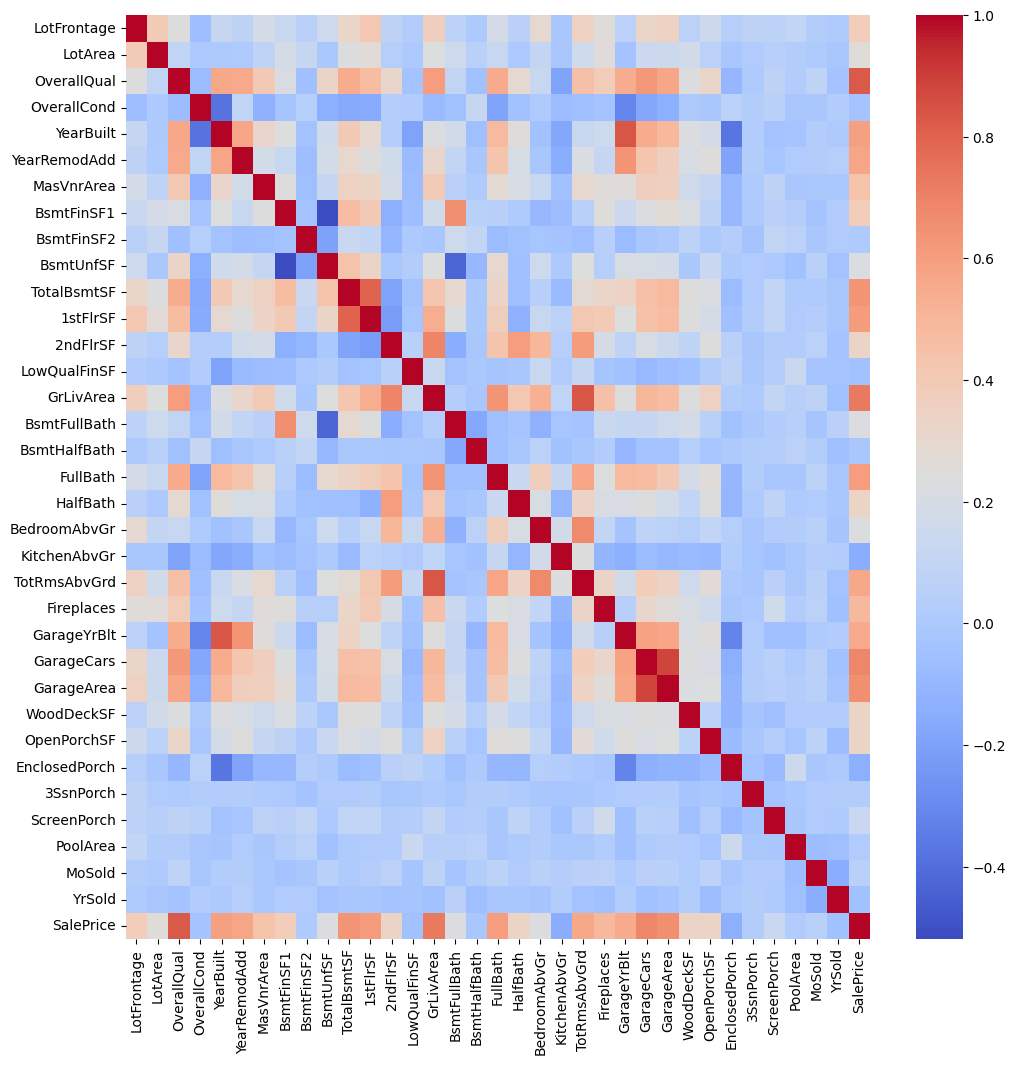

In [383]:
# 상관계수
plt.figure(figsize=(12,12))
corr = df_train[feats_n+["SalePrice"]].corr()
sns.heatmap(corr, cmap="coolwarm")

In [384]:
# 가장 높은 상관성을 보이는 상대
corr_agg = pd.DataFrame([corr[f"{i}"].nlargest(2).index[-1] for i in feats_n], index=feats_n, columns=["variable"])
corr_agg["corr"] = [corr[f"{i}"].nlargest(2).values[-1] for i in feats_n]
corr_agg
# pd.DataFrame([corr[f"{i}_corr"].nlargest(2).values[-1] for i in feats_n], index=feats_n)

variable      corr
LotFrontage         1stFlrSF  0.417729
LotArea          LotFrontage  0.389686
OverallQual        SalePrice  0.822033
OverallCond     BsmtHalfBath  0.118924
YearBuilt        GarageYrBlt  0.834147
YearRemodAdd     GarageYrBlt  0.640142
MasVnrArea         SalePrice  0.438021
BsmtFinSF1      BsmtFullBath  0.659988
BsmtFinSF2      BsmtFullBath  0.161101
BsmtUnfSF        TotalBsmtSF  0.439766
TotalBsmtSF         1stFlrSF  0.802648
1stFlrSF         TotalBsmtSF  0.802648
2ndFlrSF           GrLivArea  0.692966
LowQualFinSF        PoolArea  0.134632
GrLivArea       TotRmsAbvGrd  0.834899
BsmtFullBath      BsmtFinSF1  0.659988
BsmtHalfBath     OverallCond  0.118924
FullBath           GrLivArea  0.641319
HalfBath            2ndFlrSF  0.602823
BedroomAbvGr    TotRmsAbvGrd  0.677386
KitchenAbvGr    TotRmsAbvGrd  0.241635
TotRmsAbvGrd       GrLivArea  0.834899
Fireplaces         SalePrice  0.484955
GarageYrBlt        YearBuilt  0.834147
GarageCars        GarageArea  0.883317
GarageArea        GarageCars  0.883317
WoodDeckSF         SalePrice  0.333014
OpenPorchSF        GrLivArea  0.348135
EnclosedPorch       PoolArea  0.151186
3SsnPorch        LotFrontage  0.077538
ScreenPorch       Fireplaces  0.166580
PoolArea       EnclosedPorch  0.151186
MoSold           OverallQual  0.081755
YrSold          BsmtFullBath  0.058086

## 2-2) Numericla 변수 확인 (y~X)

- 산포도 및 편잔차분석, 선그래프

1. 비선형적인 관계를 확인할 수 있다.
2. 매끈한 비선형성은 quadratic을 이용하여 모델링
    - 대상 : qdr_obj = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
        '2ndFlrSF', 'Neighborhood', 'RoofMatl', 'GrLivArea']
3. 구간이 구분되는 비선형성은 스플라인을 이용하여 모델링
    - 대상 : 
        (OverallCond, df=7, degree=1),
        (MSSubClass, df=7, degree=1), 
        (LotArea, df=2, degree=1), 
        (FullBath, df=3, degree=1), 
        (HalfBath, df=2, degree=1), 
        (BsmtFullBath, df=3, degree=1), 
        (TotRmsAbvGrd, df=2, degree=1), 
        (LandSlope_E, df=2, degree=1), 
        (LotConfig_E, df=2, degree=1), 
        (SaleCondition_E, df=3, degree=1), 



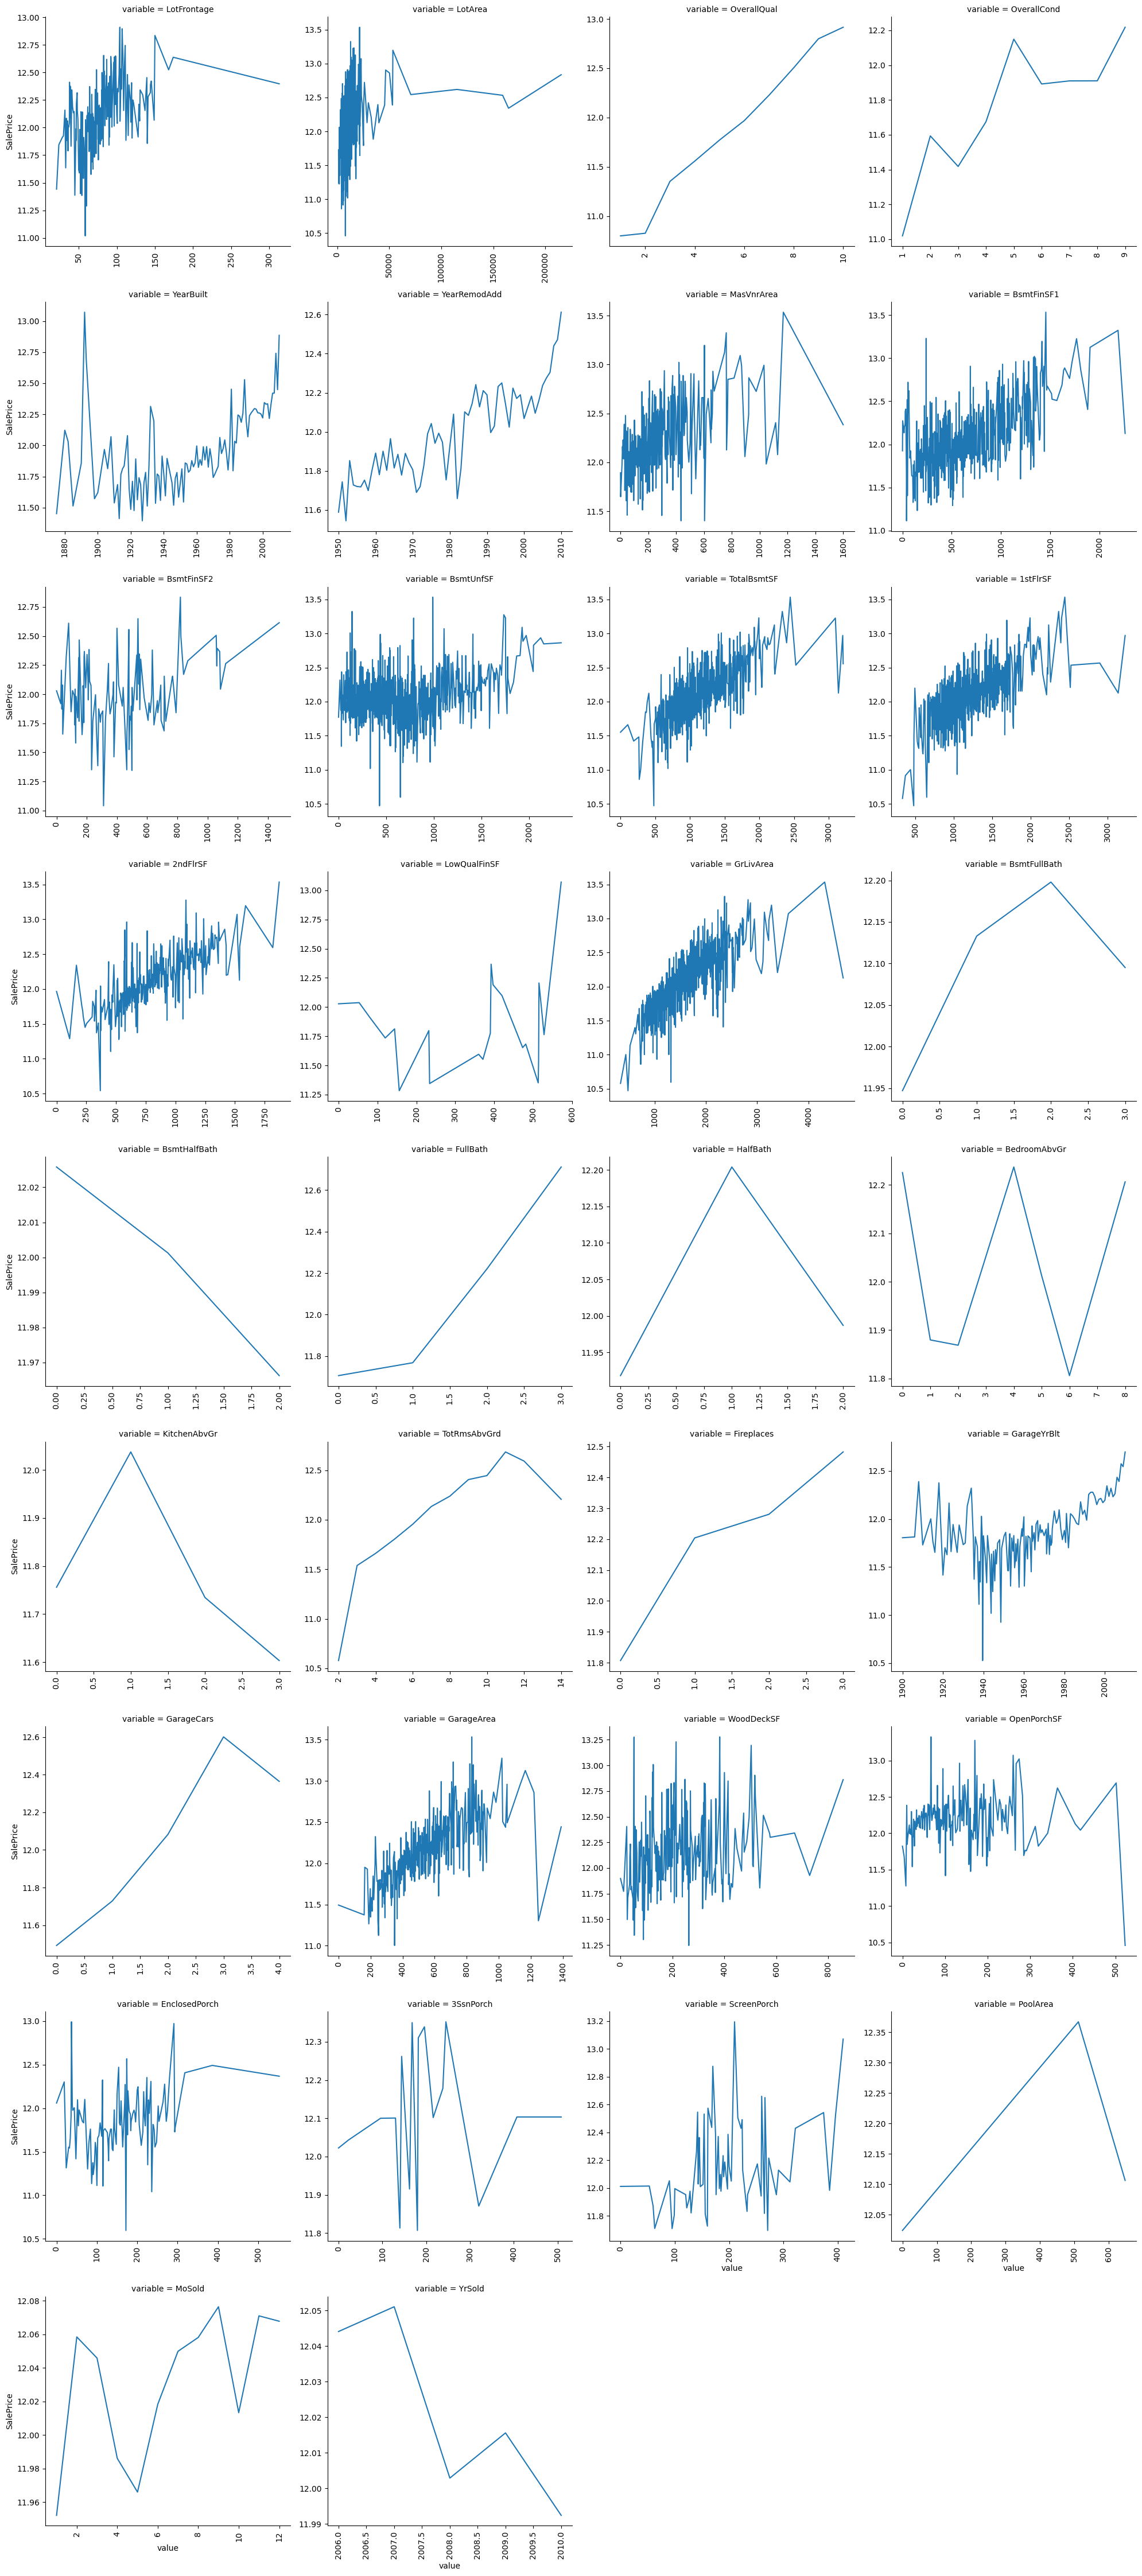

In [385]:
# 선그래프그리기
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(df_train_encoded, id_vars=['SalePrice'], value_vars=feats_n)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "SalePrice")

RMSE of nested model with train sample: 0.012455174417113676


SalePrice(observed)  Prediction  Residual
Id                                             
1               12.247694   12.250680 -0.002986
2               12.109011   12.265075 -0.156064
3               12.317167   12.239363  0.077804
4               11.849398   11.990631 -0.141233
5               12.429216   12.596978 -0.167762
...                   ...         ...       ...
1165            12.175613   12.233380 -0.057766
1166            12.359523   12.298628  0.060895
1167            12.410441   12.367286  0.043155
1168            12.061047   12.183221 -0.122174
1169            12.367341   12.270636  0.096705

[1152 rows x 3 columns]

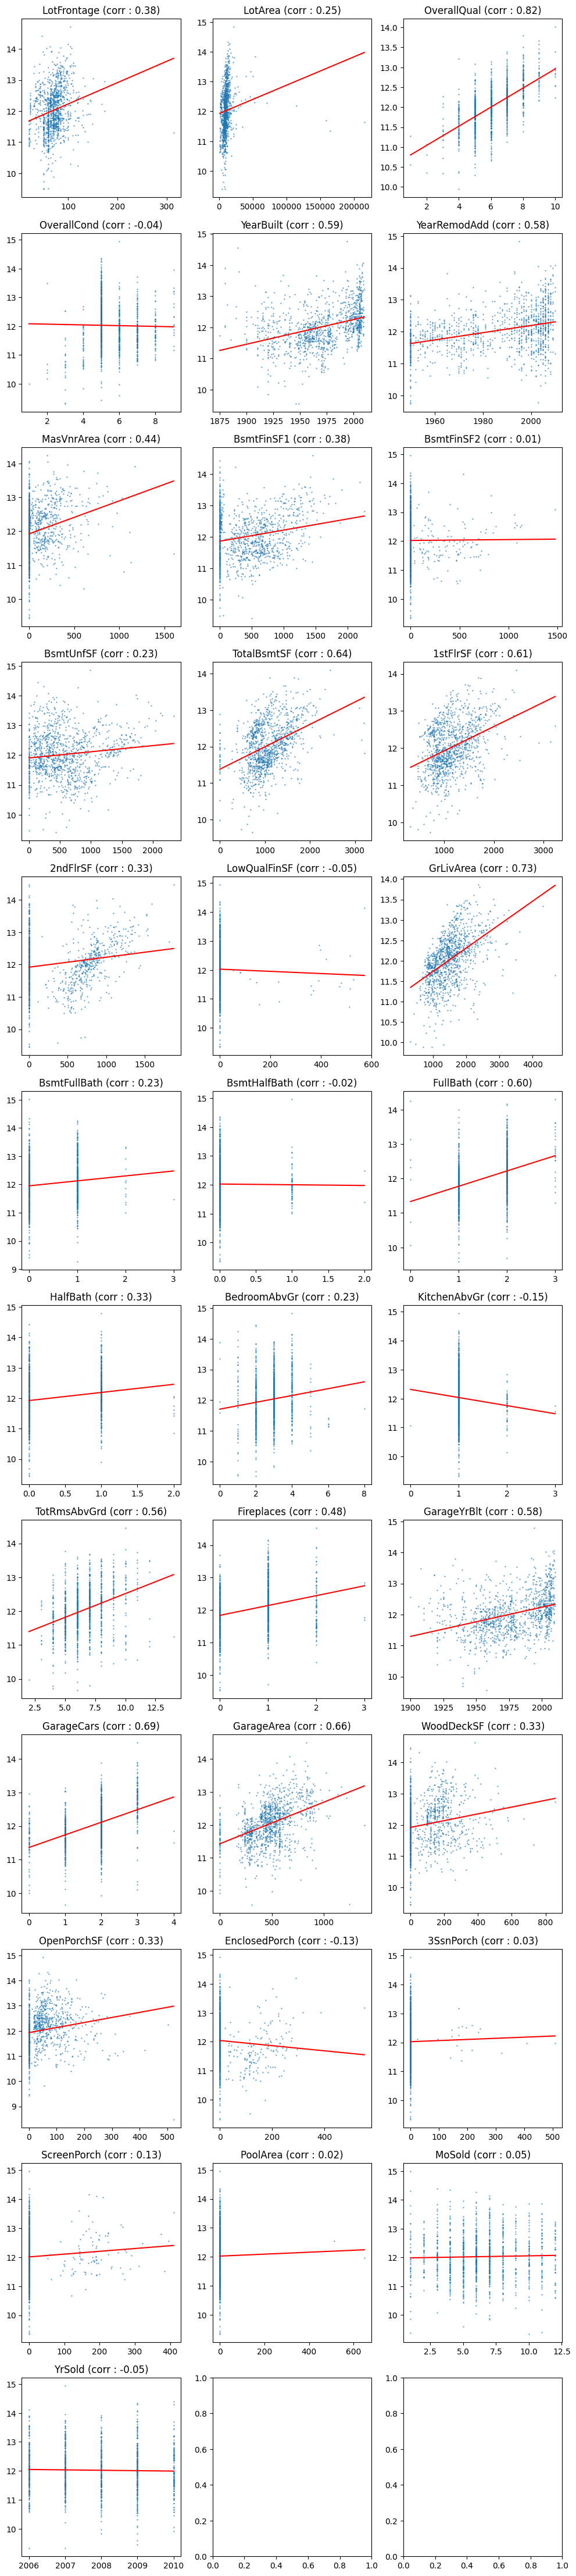

In [386]:
# 편잔차분석

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


predictor = feats
outcome = 'SalePrice'

df_train_encoded[feats] = df_train_encoded[feats].astype("float64")

lm = LinearRegression()
lm.fit(df_train_encoded[predictor], df_train_encoded[outcome])
pred = lm.predict(df_train_encoded[predictor])
resid = df_train_encoded[outcome] - pred
 


lm_nested =pd.DataFrame([df_train_encoded[outcome].values, pred, resid], 
                        index=[f"{outcome}(observed)", "Prediction", "Residual"], 
                        columns=df_train.index).T

print("RMSE of nested model with train sample:", mean_squared_error(pred, df_train_encoded[outcome]))
display(lm_nested)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
fig, axs = plt.subplots(len(feats_n)//3+1,3, figsize=(12, len(feats_n)/3*5))
resids = []
for i in range(len(feats_n)):
    # 1변량만을 이용한 회귀분석
    predictor = feats_n[i]
    outcome = 'SalePrice'

    df_train_encoded[feats_n] = df_train_encoded[feats_n].astype("float64")

    lm = LinearRegression()
    lm.fit(df_train_encoded[[predictor]], df_train_encoded[outcome])
    pred = lm.predict(df_train_encoded[[predictor]])

    resid = df_train_encoded[outcome] - pred
    
    # 회귀식 원형 + 편잔차
    partial_analysis = lm_nested["Prediction"]+resid
    
    # 시각화
    x=np.linspace(df_train_encoded[predictor].min(), df_train_encoded[predictor].max())
    y = lm.coef_[0]*x + lm.intercept_
    
    r = i // 3
    c = i % 3

    axs[r,c].plot(x,y, c='r')
    axs[r,c].scatter(df_train_encoded[predictor].values,partial_analysis,s=0.2)
    axs[r,c].set_title("{} (corr : {:.2f})".format(predictor, df_train_encoded[feats_n+["SalePrice"]].corr()["SalePrice"][i]))
plt.show()


## 2-3) Categorical 변수 확인 (X~X)

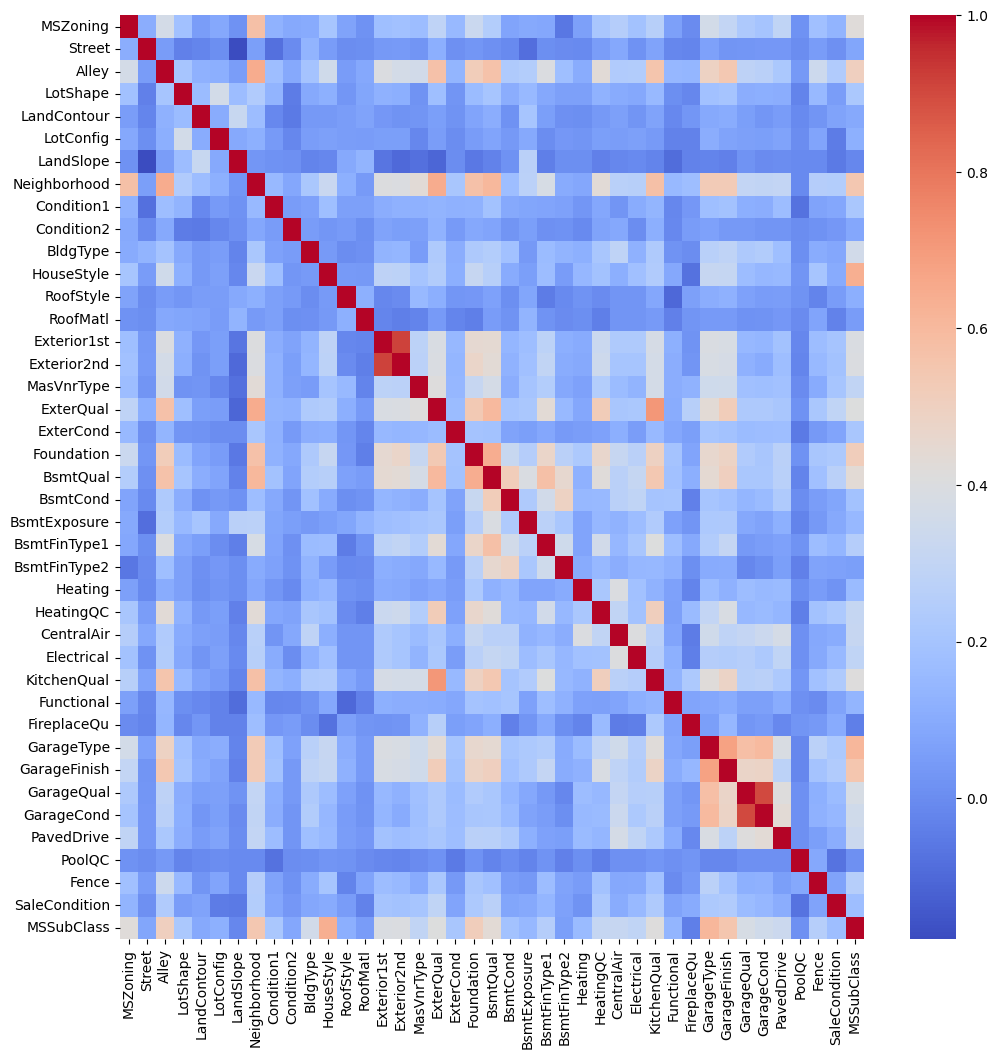

In [387]:
# 상관계수 분석
corr_c = df_train_encoded[feats_c].corr()
plt.figure(figsize=(12,12))
f = sns.heatmap(corr_c, cmap='coolwarm')

## 2-4) Categoriccal 변수 확인 (y~X)

1. unownded는 하나의 변수로 포함하여 표시되어 있음
2. 일부 클래스의 경우 다른 클래스에 비해서 높은 변동성을 보이는 경우도 있음.
3. 가장 많은 클래스를 가진 변수의 클래스 갯수는 25개임. (Neighborhood) : 유사한 성질을 가지는 카테고리끼리 통폐합하여도 됨.
4. 이상치를 클래스별로 더러 가지고 있는 것으로 확인됨

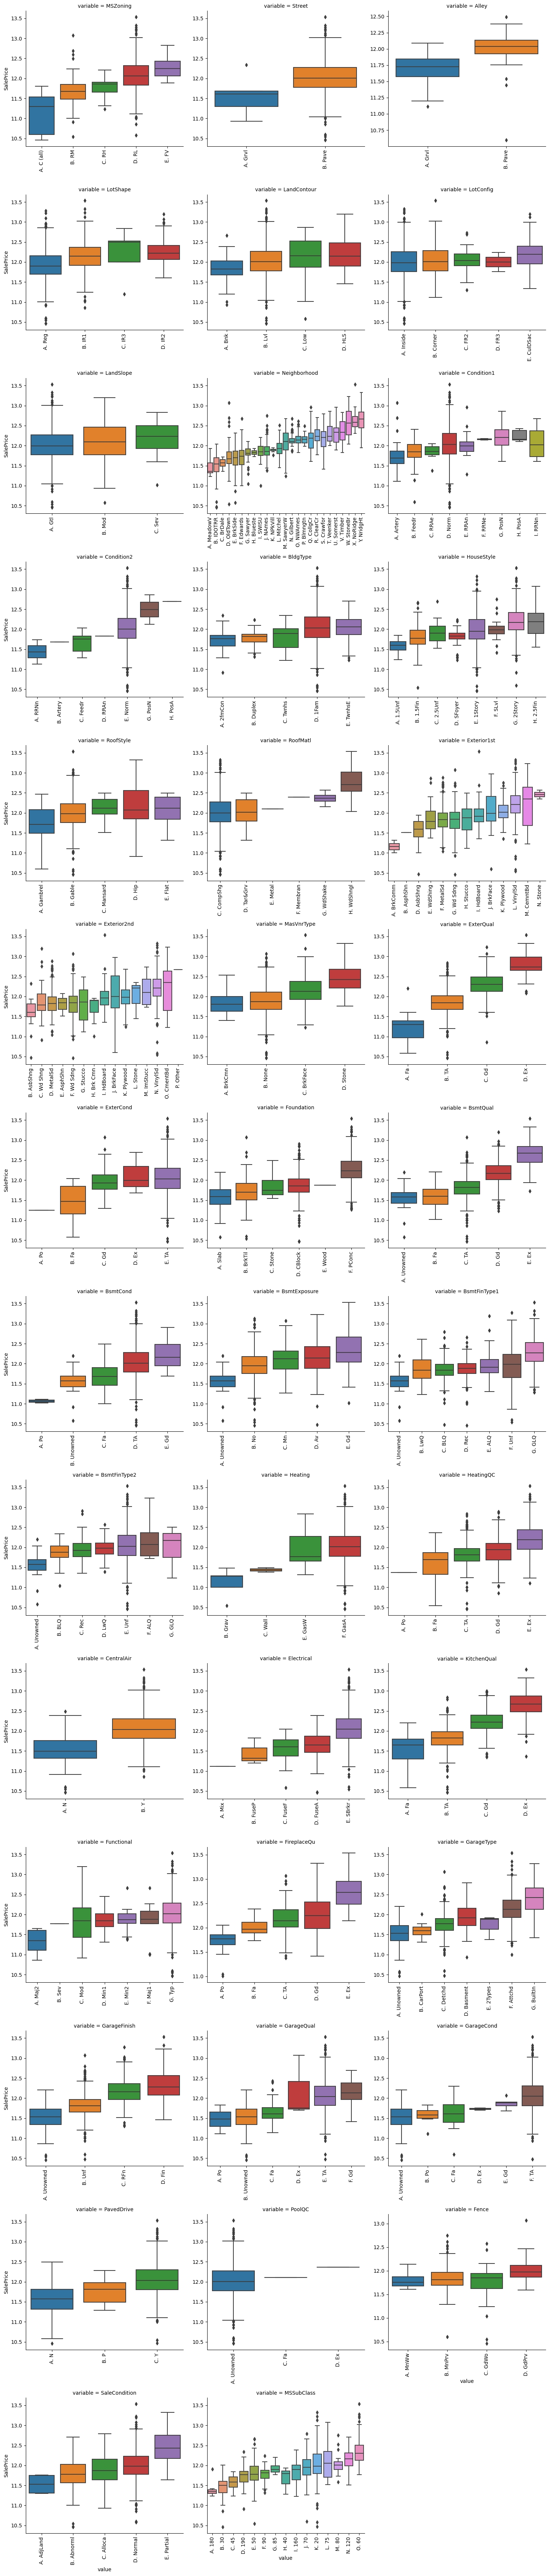

In [388]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
# 데이터 재정렬
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=feats_c)

# 오름순으로 그래프 표시하기 위한 정렬 (평균보다 robust한 mean 값을 이용)
for i in feats_c :    
    f.iloc[f[f["variable"]==i].index,:]=f[f["variable"]==i].sort_values("value")    

# 그래프 그리기
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice", )

- ANOVA 분석

1. 각 범주가 종속변수(y)에 대한 설명력을 ANOVA를 이용하여 시각화 하였습니다.
    - 설명력이 높다는 것은 클래스별 구분이 유의미하다는 것을 의미할 것입니다.
2. p-val이 낮을수록 유의미하며, y축은 dispairty (=로그스케일 p-val의 역수)로 시각화하였습니다.
3. 분석결과 가설설정에서 설정되었듯 위치변수가 가장 큰 영향력을 가지는 것으로 판단이 됩니다.


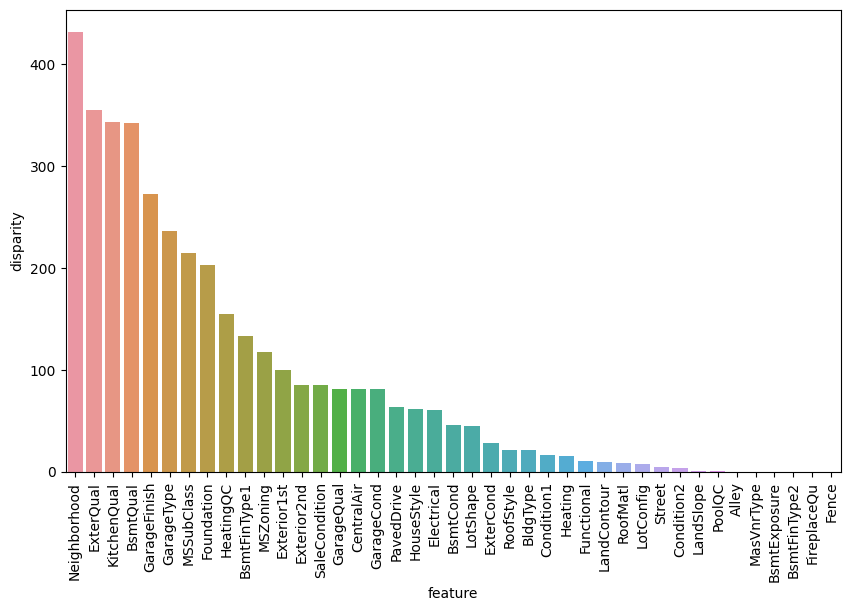

In [389]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = feats_c
    pvals = []
    for c in feats_c:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values            
            samples.append(s)

        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df_train)
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(figsize=(10,6))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

# p-value가 높을 수록 class 구분이 종속변수에 대한 설명력을 높게 가진다고 설명할 수 있다.
# 다음은 범주형 변수가 SalePrice에 미치는 영향을 빠르게 추정하는 방법입니다. 
# 각 변수에 대해 SalePrice를 범주 값에 따라 구분된 집합으로 분할합니다. 
# 그런 다음 ANOVA 테스트를 사용하여 집합이 유사한 분포를 가지는지 확인합니다.
#  변수의 영향이 미미하다면 집합 평균은 동일해야 합니다. 
# p-값이 감소하는 것은 분할 간 다양성이 증가하는 신호입니다.

# 분석결과 4개의 변수에서 크게 유의미성을 보였기 때문에 4개만 사용 결정
# 4개 중 2개 exterqual, 과  bsmtqual은 overallqual과 다름이 없기 때문에,
# 결과적으로 overallqual과 neighborhood 2개를 사용하기로 결정.


- 산포도 및 편잔차분석, 선그래프

1. 비선형적인 관계를 확인할 수 있다.
2. 매끈한 비선형성은 quadratic을 이용하여 모델링
    - 대상 : qdr_obj = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
        '2ndFlrSF', 'Neighborhood', 'RoofMatl', 'GrLivArea']
3. 구간이 구분되는 비선형성은 스플라인을 이용하여 모델링
    - 대상 : 
        (OverallCond, df=7, degree=1),
        (MSSubClass, df=7, degree=1), 
        (LotArea, df=2, degree=1), 
        (FullBath, df=3, degree=1), 
        (HalfBath, df=2, degree=1), 
        (BsmtFullBath, df=3, degree=1), 
        (TotRmsAbvGrd, df=2, degree=1), 
        (LandSlope_E, df=2, degree=1), 
        (LotConfig_E, df=2, degree=1), 
        (SaleCondition_E, df=3, degree=1), 



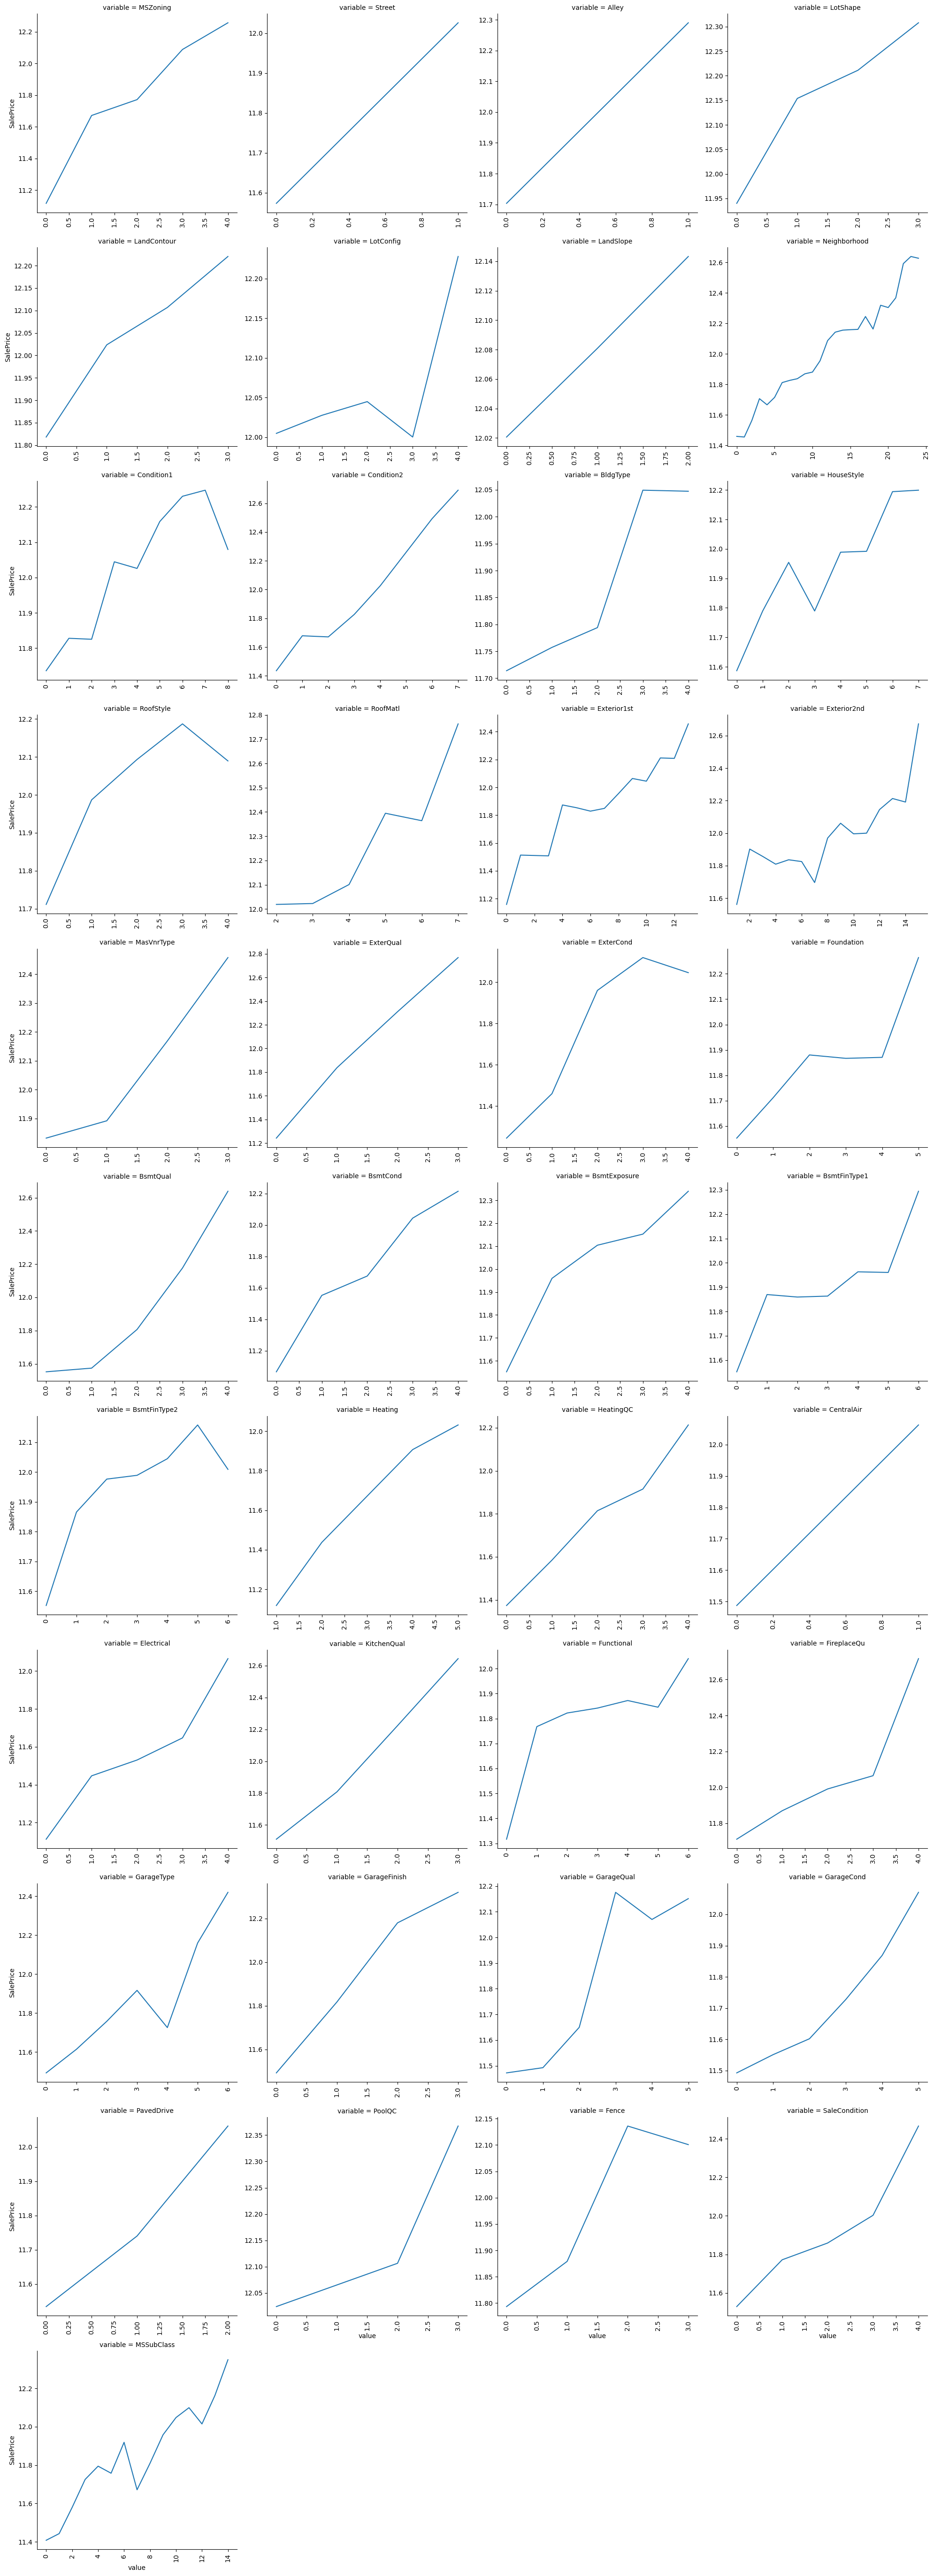

In [390]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(df_train_encoded, id_vars=['SalePrice'], value_vars=feats_c)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "SalePrice")

RMSE of nested model with train sample: 0.012455174417113676


SalePrice(observed)  Prediction  Residual
Id                                             
1               12.247694   12.250680 -0.002986
2               12.109011   12.265075 -0.156064
3               12.317167   12.239363  0.077804
4               11.849398   11.990631 -0.141233
5               12.429216   12.596978 -0.167762
...                   ...         ...       ...
1165            12.175613   12.233380 -0.057766
1166            12.359523   12.298628  0.060895
1167            12.410441   12.367286  0.043155
1168            12.061047   12.183221 -0.122174
1169            12.367341   12.270636  0.096705

[1152 rows x 3 columns]

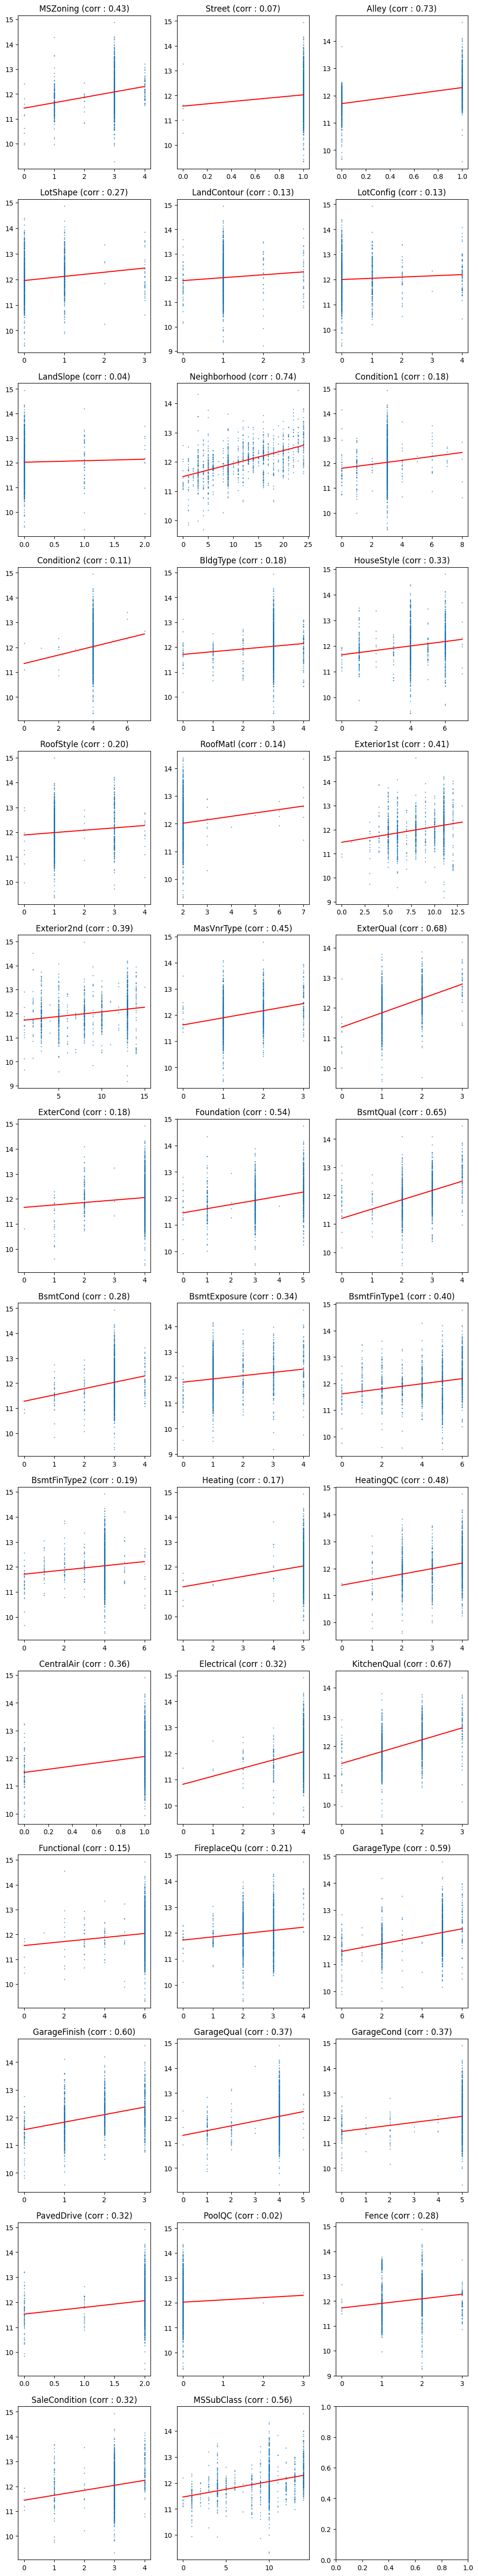

In [391]:
# 편잔차분석

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


predictor = feats
outcome = 'SalePrice'

df_train_encoded[feats] = df_train_encoded[feats].astype("float64")

lm = LinearRegression()
lm.fit(df_train_encoded[predictor], df_train_encoded[outcome])
pred = lm.predict(df_train_encoded[predictor])
resid = df_train_encoded[outcome] - pred
 


lm_nested =pd.DataFrame([df_train_encoded[outcome].values, pred, resid], 
                        index=[f"{outcome}(observed)", "Prediction", "Residual"], 
                        columns=df_train.index).T

print("RMSE of nested model with train sample:", mean_squared_error(pred, df_train_encoded[outcome]))
display(lm_nested)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
fig, axs = plt.subplots(len(feats_c)//3+1,3, figsize=(12, len(feats_c)/3*5))
resids = []
for i in range(len(feats_c)):
    # 1변량만을 이용한 회귀분석
    predictor = feats_c[i]
    outcome = 'SalePrice'

    df_train_encoded[feats_c] = df_train_encoded[feats_c].astype("float64")

    lm = LinearRegression()
    lm.fit(df_train_encoded[[predictor]], df_train_encoded[outcome])
    pred = lm.predict(df_train_encoded[[predictor]])

    resid = df_train_encoded[outcome] - pred
    
    # 회귀식 원형 + 편잔차
    partial_analysis = lm_nested["Prediction"]+resid
    
    # 시각화
    x=np.linspace(df_train_encoded[predictor].min(), df_train_encoded[predictor].max())
    y = lm.coef_[0]*x + lm.intercept_
    
    r = i // 3
    c = i % 3

    axs[r,c].plot(x,y, c='r')
    axs[r,c].scatter(df_train_encoded[predictor].values,partial_analysis,s=0.2)
    axs[r,c].set_title("{} (corr : {:.2f})".format(predictor, df_train_encoded[feats_c+["SalePrice"]].corr()["SalePrice"][i]))
plt.show()


2-5) Numerical 변수 vs Categorical 변수 (X~X)

<Axes: >

<Figure size 800x800 with 0 Axes>

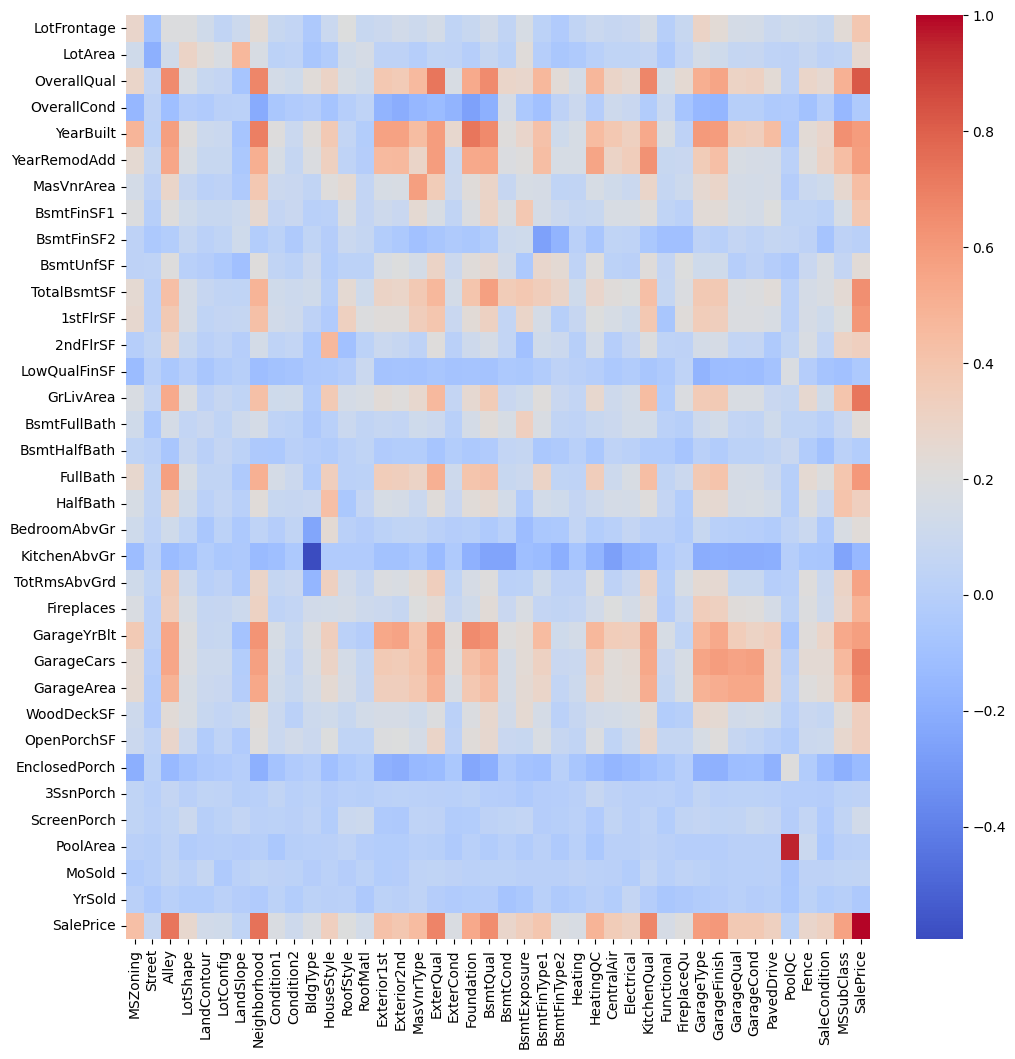

In [392]:
# 상관계수 확인
cmap='coolwarm'


plt.figure(3, figsize=(8,8))

corr = pd.DataFrame(np.zeros([len(feats_n)+1, len(feats_c)+1]), index=feats_n+['SalePrice'], columns=feats_c+['SalePrice'])
for q1 in feats_n+['SalePrice']:
    for q2 in feats_c+['SalePrice']:
        corr.loc[q1, q2] = df_train_encoded[q1].corr(df_train_encoded[q2])

plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap=cmap)

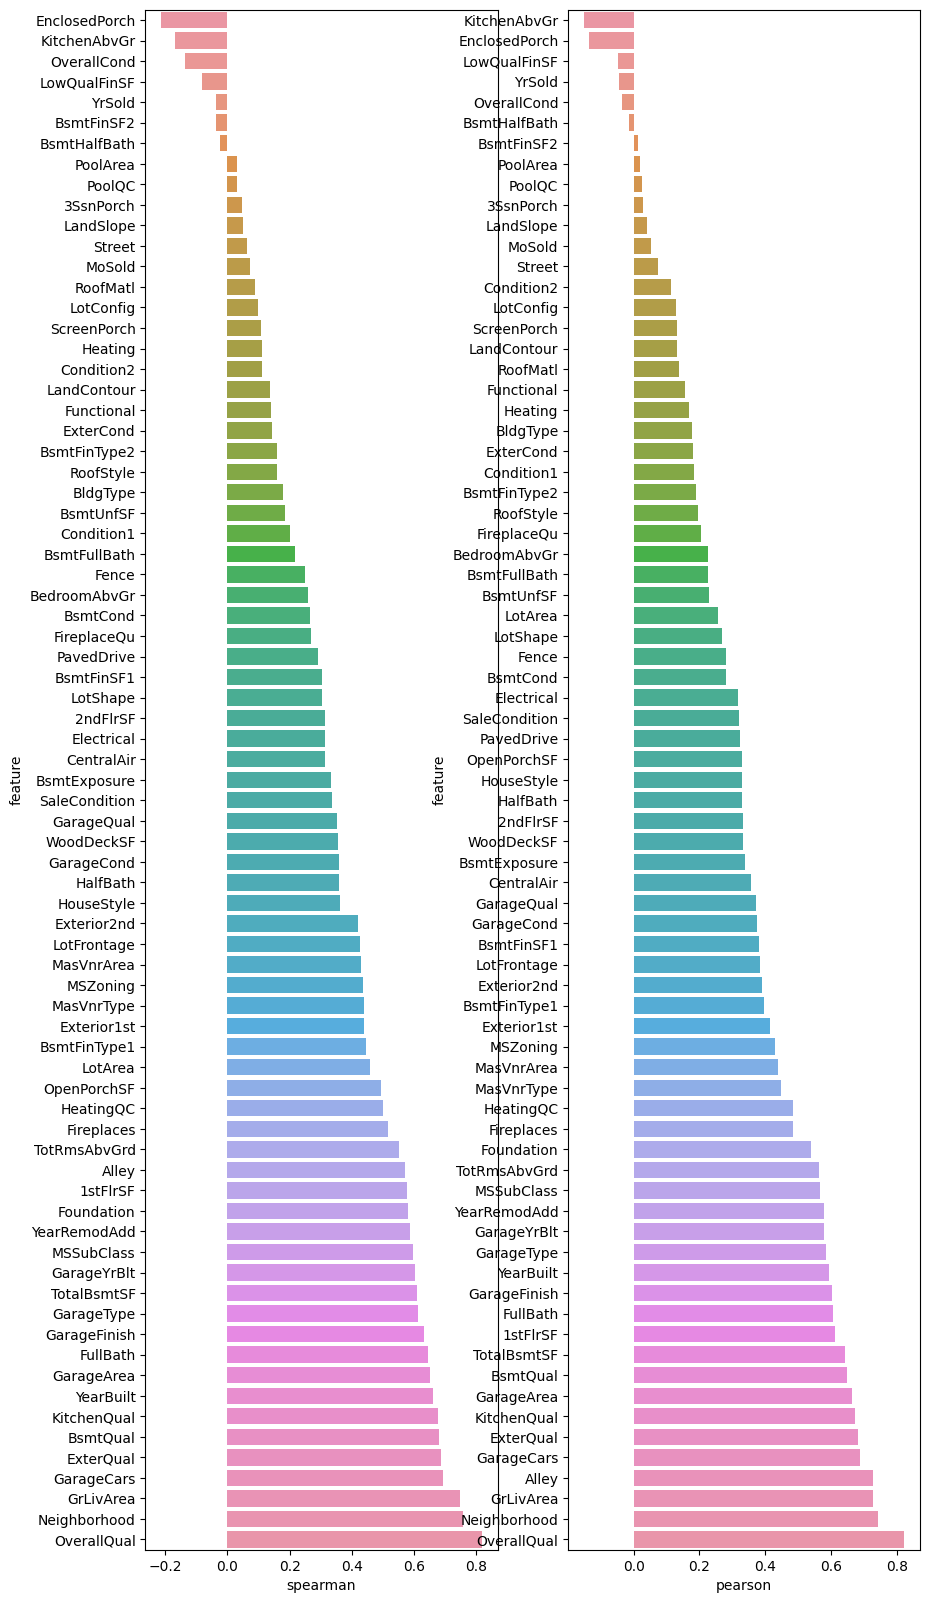

<Figure size 600x1875 with 0 Axes>

<Figure size 600x1875 with 0 Axes>

In [393]:
# 상관계수 확인
def spearman(frame, features, ax):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h', ax=ax)
    

def pearson(frame, features, ax):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['pearson'] = [frame[f].corr(frame['SalePrice'], 'pearson') for f in features]
    spr = spr.sort_values('pearson')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='pearson', orient='h', ax=ax)
    

features = feats_n + feats_c
fig, axs = plt.subplots(1,2, figsize=(10,20))
spearman(df_train, features, ax=axs[0])
pearson(df_train_encoded, features, ax=axs[1])

#### 4단계 : 자료가공(wrangling)과 데이터준비(preparation)

- 특성공학 : 스케일링과 스트럭쳐링

EDA 과정을 통해 파악한 내용을 변수들에게 적용한다. 
1. 히스토그램을 통해 파악한 분포의 우측치우침 현상을 log 스케일링을 통해 정규분포화 한다.
2. pairplot 및 편잔차분석을 통해 확인한 비선형관계를 quadratic 및 스플라인을 통해서 적합화한다.
3. 상관계수분석을 통해 파악한 독립변수간 상호작용을 상호작용항을 통해서 적합화한다.
4. 수치형 변수에서 '0' 값이 많이 관측되었던 사실로 미루어, \
보유여부 자체가 중요하다고 생각되는 항목들에 대해서 보유여부를 나타내는 이진변수를 생성한다.

In [394]:
# 처리7 : 로그스케일링
log_obj = ['GrLivArea','1stFlrSF','2ndFlrSF','TotalBsmtSF','LotArea','LotFrontage','KitchenAbvGr','GarageArea', 'BsmtUnfSF', 'TotalBsmtSF']

def scaling_log(df, log_obj) :   
    for i in log_obj :
        if any(x<=0 for x in df[i].values) :
            df[i] += df[i].min() +1
        df[i] = np.log(df[i])
    return df


           
# 처리8 : quadratic
def quadratic(df) :
    for i in qdr_obj :
        df[f"{i}2"] = df[i]**2
    return df

qdr_obj = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
        '2ndFlrSF', 'Neighborhood', 'RoofMatl', 'GrLivArea']
qdr_res = [f"{i}2" for i in qdr_obj]

# spline
bs_obj = []

#bs(OverallCond, df=7, degree=1) + \
#        bs(MSSubClass, df=7, degree=1) + \
#        bs(LotArea, df=2, degree=1) + \
#        bs(FullBath, df=3, degree=1) + \
#        bs(HalfBath, df=2, degree=1) + \
#        bs(BsmtFullBath, df=3, degree=1) + \
#        bs(TotRmsAbvGrd, df=2, degree=1) + \
#        bs(LandSlope_E, df=2, degree=1) + \
#        bs(LotConfig_E, df=2, degree=1) + \
#        bs(SaleCondition_E, df=3, degree=1) + \


# 상호작용
corr_obj = ['Neighborhood_E:OverallQual', 'MSSubClass:BldgType_E', 'ExterQual_E:OverallQual', 'PoolArea:PoolQC_E', 'Fireplaces:FireplaceQu_E',
          'OverallQual:KitchenQual_E', 'GarageQual_E:GarageCond','GarageArea:GarageCars', '1stFlrSF:TotalBsmtSF', 
          'TotRmsAbvGrd:GrLivArea']

# 원래 1stFlrSF에 Q가 붙어있었다.

# 처리 9 : 보유여부 boolean
def having(df) :
    for i in boolean_obj :
        df[f"Has{i}"] = df[i].apply(lambda x : 1 if x > 0 else 0)
    return df

boolean_obj = ['Basement', 'Garage', '2ndFloor', 'MasVnr', 'WoodDeck', 'Porch', 'Pool', 'IsNew']
boolean_res = [f"Has{i}" for i in boolean_obj]

In [395]:
df_train_zz = scaling_log(df_train, log_obj)
df_train_encoded["Alley"]

Id
1       1.0
2       1.0
3       1.0
4       0.0
5       1.0
       ... 
1165    1.0
1166    1.0
1167    1.0
1168    1.0
1169    1.0
Name: Alley, Length: 1152, dtype: float64

In [396]:
#def encode(frame, feature):
#    ordering = pd.DataFrame()
#    ordering['val'] = frame[feature].unique()
#    ordering.index = ordering.val
#    ordering['spmean'] = framefeature, 'SalePrice'.groupby(feature).mean()['SalePrice']
#    ordering = ordering.sort_values('spmean')
#    ordering['ordering'] = range(1, ordering.shape[0]+1)
#    ordering = ordering['ordering'].to_dict()
#
#    print(ordering)
#    
#    for cat, o in ordering.items():
#        frame.loc[frame[feature] == cat, feature+'_E'] = o
#    
#qual_encoded = []
#for q in feats_c:  
#    encode(df_train, q)
#    qual_encoded.append(q+'_E')
#print(qual_encoded)

# 5단계 : 모델 선택 

1. 모델의 갯수 설정
2. 선형모델
	- 단계적 회귀분석(전진선택)
	- 잔차분석 : 비정상성 진단과 처리
3. 비선형모델	
	- 상호관계항
	- 다항회귀 
	- 잔차분석 : 비정상성 진단과 처리
4. 기계학습
	- 비지도학습 : 의사결정나무, KNN
	- 인공신경망모형 : DNN
	- 지도학습 : 랜덤포레스트
5. 모델튜닝(기계학습 모형 채택 경우)

In [397]:
# 전부다
from statsmodels.api import OLS

predictor = feats
outcome = "SalePrice"

X = sm.add_constant(df_train_encoded[predictor])
y = df_train_encoded[outcome]

model = OLS(y,X)
result = model.fit()

prediction =  result.predict(X)

print("RMSE", mean_squared_error(y, prediction))
print(result.summary())

RMSE 0.012455174417113697
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     176.9
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:04:00   Log-Likelihood:                 891.50
No. Observations:                1152   AIC:                            -1635.
Df Residuals:                    1078   BIC:                            -1261.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            19.

<Figure size 640x480 with 0 Axes>

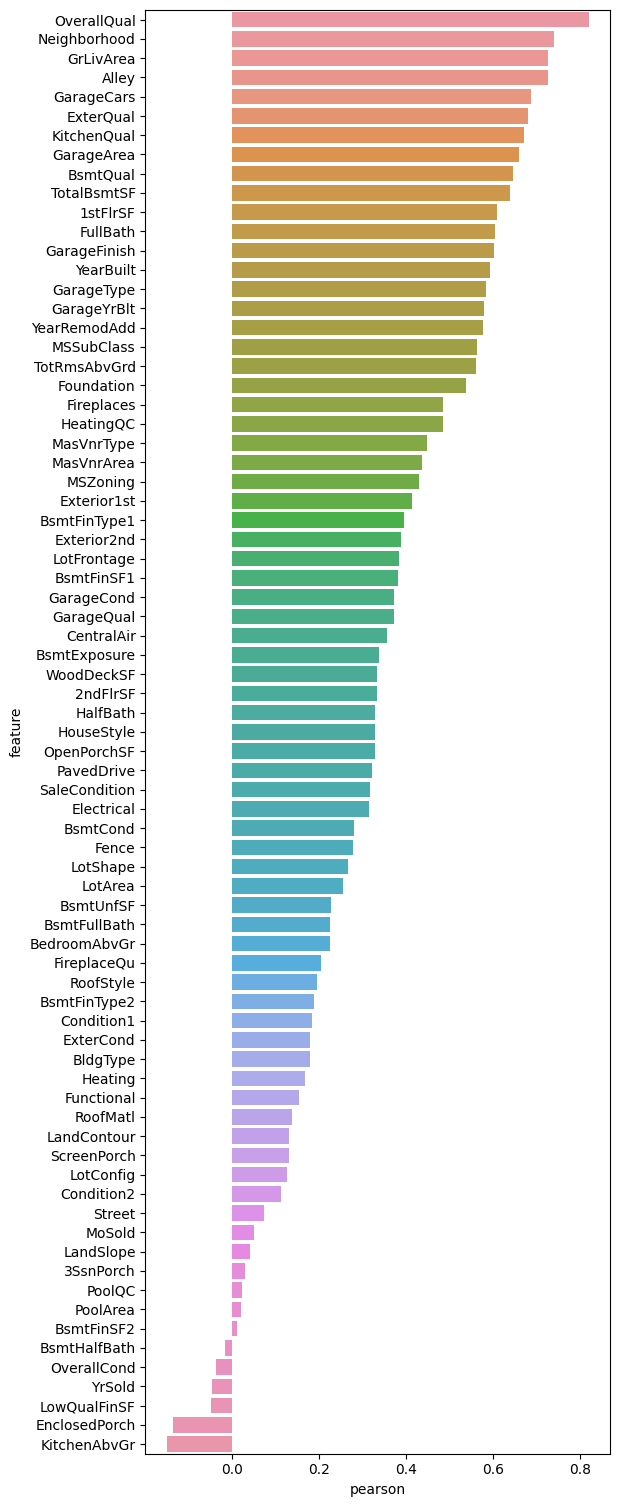

In [398]:
# 상관계수 정렬   
def pearson(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['pearson'] = [frame[f].corr(frame['SalePrice'], 'pearson') for f in features]
    spr = spr.sort_values('pearson', ascending=False)
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='pearson', orient='h')

    return spr


    

plt.figure()
df_corr=pearson(df_train_encoded, feats)
plt.show()

In [399]:
df_corr

feature   pearson
15    OverallQual  0.822033
10   Neighborhood  0.741692
44      GrLivArea  0.727178
5           Alley  0.726164
59     GarageCars  0.688746
..            ...       ...
16    OverallCond -0.036565
73         YrSold -0.045215
43   LowQualFinSF -0.048124
66  EnclosedPorch -0.134683
50   KitchenAbvGr -0.150195

[75 rows x 2 columns]

model                                            feature      RMSE  \
0    stepwise1                                      [OverallQual]  0.052409   
1    stepwise2                           [OverallQual, GrLivArea]  0.038170   
2    stepwise3             [OverallQual, GrLivArea, Neighborhood]  0.028894   
3    stepwise4      [OverallQual, GrLivArea, Neighborhood, Alley]  0.027497   
4    stepwise5  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.025895   
..         ...                                                ...       ...   
69  stepwise70  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.012918   
70  stepwise71  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.012237   
71  stepwise72  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.012191   
72  stepwise73  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.012186   
73  stepwise74  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.012144   

    R_square  Adjusted_R_square      F_stastic          AIC          BIC  \
0   0.675739           0.675457  1.663966e-283  -123.647361  -113.548851   
1   0.763836           0.763425   0.000000e+00  -486.857210  -471.709445   
2   0.821226           0.820759   0.000000e+00  -805.578252  -785.381233   
3   0.829870           0.829277   0.000000e+00  -860.673547  -835.427272   
4   0.839786           0.839087   0.000000e+00  -927.851916  -897.556387   
..       ...                ...            ...          ...          ...   
69  0.920072           0.914896   0.000000e+00 -1598.928632 -1240.431538   
70  0.924289           0.919312   0.000000e+00 -1659.380555 -1295.834207   
71  0.924575           0.919542   0.000000e+00 -1661.736554 -1293.140951   
72  0.924603           0.919497   0.000000e+00 -1660.167432 -1286.522573   
73  0.924864           0.919701   0.000000e+00 -1662.159047 -1283.464934   

       RMSE_CV  
0   123.590235  
1   123.956098  
2   124.059843  
3   124.007883  
4   124.021340  
..         ...  
69  124.033560  
70  124.074466  
71  124.072589  
72  124.073792  
73  124.077922  

[74 rows x 9 columns]

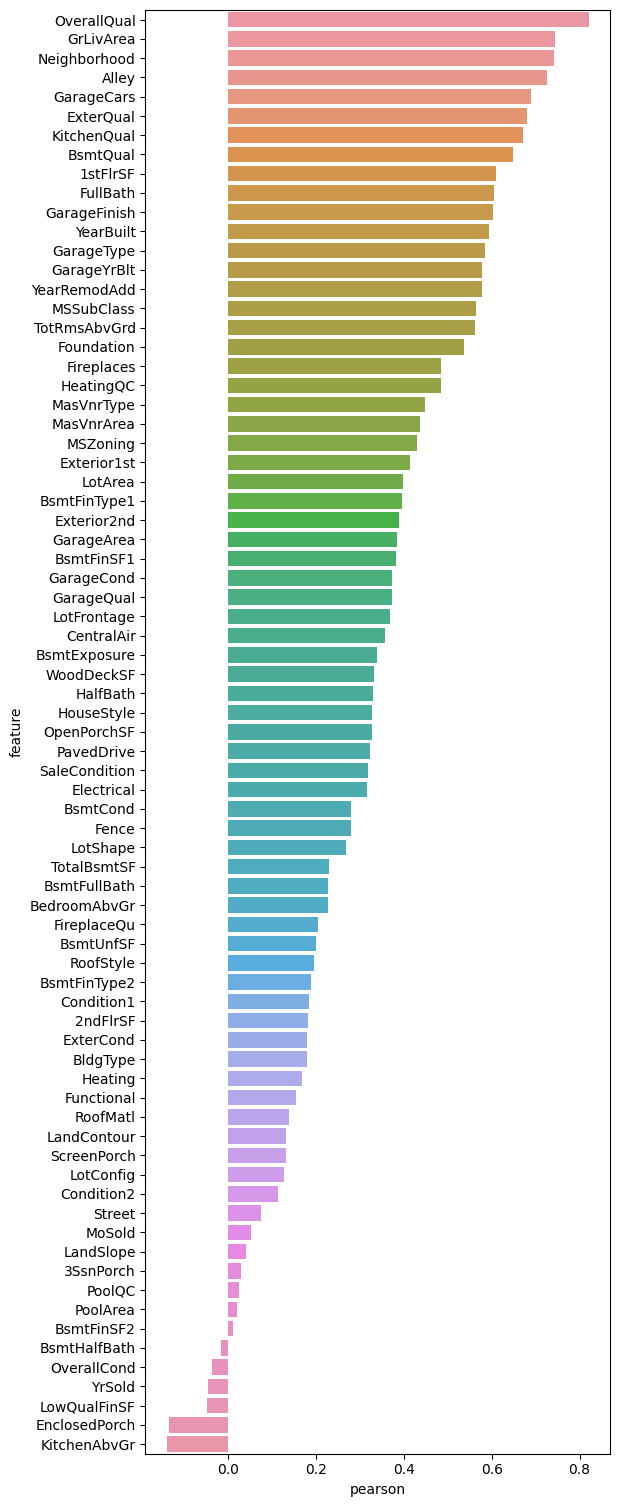

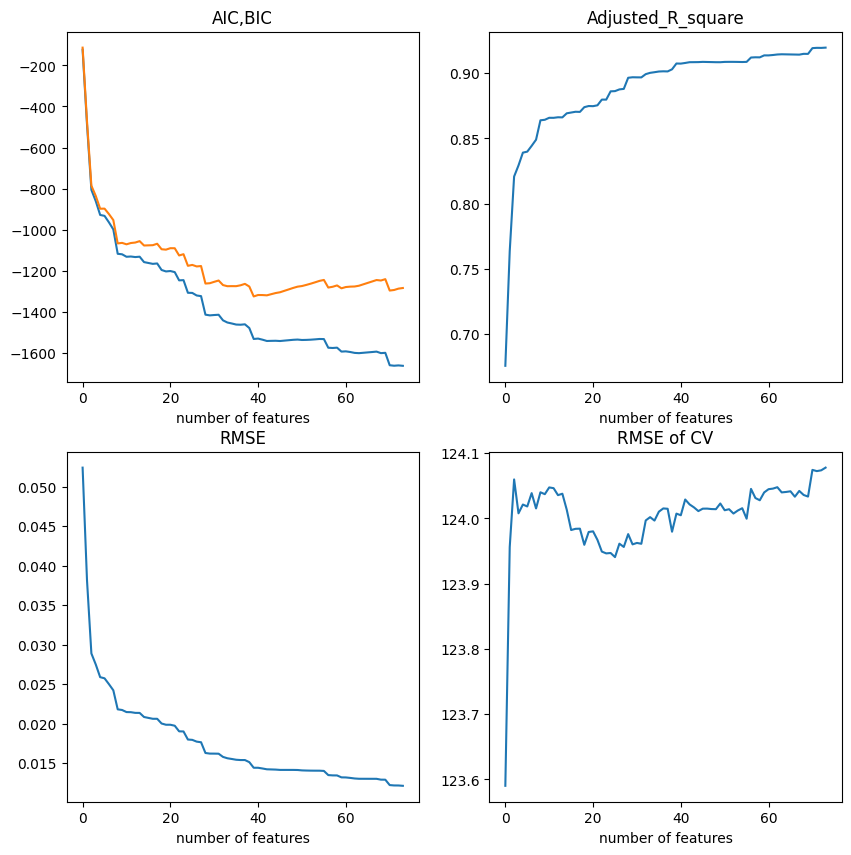

In [434]:

def stepwise_regression(df_train, df_cv, feature) :

    df_train = df_train.copy()
    df_cv = df_cv.copy()
    
    df_corr = pearson(df_train,feature)

    stepwise_predictor = [df_corr['feature'].values[:i] for i in range(1,len(feats))]
    res_RMSE = []
    res_RMSE_CV = []
    res_R_square = []
    res_Adjusted_R_square = []
    res_F_stastic = []
    res_AIC = []
    res_BIC = []
    res_CV_prediction = []

    
    until = len(stepwise_predictor)

    for i in stepwise_predictor[:until] :
        predictor = i
        outcome = "SalePrice"

        #X = sm.add_constant(df_train[predictor])
        X = df_train[predictor]
        X = sm.add_constant(X)
        y = df_train[outcome]

        model = OLS(y,X)
        result = model.fit()
        prediction =  result.predict(X)      
        
        
        #df_cv.insert(0,'const', [result.params[0] for _ in range(len(df_cv))])
        X_CV = df_cv[predictor]
        X_CV = sm.add_constant(X_CV)
        prediction_CV = result.predict(X_CV)

        

        
        res_RMSE.append(mean_squared_error(y, prediction))
        res_RMSE_CV.append(mean_squared_error(df_cv[outcome], prediction_CV))
        res_R_square.append(result.rsquared)
        res_Adjusted_R_square.append(result.rsquared_adj)
        res_F_stastic.append(result.f_pvalue)
        res_AIC.append(result.aic)
        res_BIC.append(result.bic)

            # 단계적 선형회귀
    agg = pd.DataFrame()
    agg["model"] = [f"stepwise{i+1}" for i in range((until))]
    agg["feature"] = stepwise_predictor
    agg["RMSE"] = res_RMSE
    agg["R_square"] = res_R_square
    agg["Adjusted_R_square"] = res_Adjusted_R_square
    agg["F_stastic"] = res_F_stastic
    agg["AIC"] = res_AIC
    agg["BIC"] = res_BIC
    agg["RMSE_CV"] = res_RMSE_CV


    if display :
        display(agg)

        fig, axs = plt.subplots(2,2, figsize = (10,10))
        axs[0,0].plot(agg[['AIC','BIC']])
        axs[0,0].set_xlabel('number of features')
        axs[0,0].set_title('AIC,BIC')
        axs[0,1].plot(agg[['Adjusted_R_square']])
        axs[0,1].set_xlabel('number of features')
        axs[0,1].set_title('Adjusted_R_square')
        axs[1,0].plot(agg[['RMSE']])
        axs[1,0].set_xlabel('number of features')
        axs[1,0].set_title('RMSE')
        axs[1,1].plot(agg[['RMSE_CV']])
        axs[1,1].set_xlabel('number of features')
        axs[1,1].set_title('RMSE of CV')
        plt.show()

    return agg

df_cv_encoded["SalePrice"] = np.log(df_cv_encoded["SalePrice"])
linear_regression_original = stepwise_regression(df_train_encoded, df_cv_encoded, feats)
        



In [414]:
for i in range(len(linear_regression_original['RMSE_CV'])-1) :    
    
    if linear_regression_original['RMSE_CV'][i] / linear_regression_original['RMSE_CV'][i+1] -1 < 0.01 :
        print(i)
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72


In [415]:
# 로그변환
df_train_encoded_log = scaling_log(df_train_encoded, log_obj)
df_cv_encoded_log = scaling_log(df_cv_encoded, log_obj)

display(df_train_encoded_log, df_cv_encoded_log)
print(np.sum(df_train_encoded_log.isna().any()), np.sum(df_cv_encoded_log.isna().any()))

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
Id                                                                           
1           14.0       3.0     1.428968  2.201872     1.0    1.0       0.0   
2           10.0       3.0     1.477511  2.215885     1.0    1.0       0.0   
3           14.0       3.0     1.439718  2.233034     1.0    1.0       1.0   
4            9.0       3.0     1.409607  2.215315     1.0    0.0       1.0   
5           14.0       3.0     1.488584  2.258133     1.0    1.0       1.0   
...          ...       ...          ...       ...     ...    ...       ...   
1165        12.0       3.0     1.501549  2.271106     1.0    1.0       1.0   
1166        10.0       3.0     1.474637  2.215212     1.0    1.0       1.0   
1167        10.0       3.0     1.425247  2.225353     1.0    1.0       1.0   
1168        14.0       3.0     1.401292  2.229165     1.0    1.0       1.0   
1169         9.0       3.0     1.566007  2.254150     1.0    1.0       0.0   

      LandContour  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
Id                                       ...                             
1             1.0        0.0        0.0  ...            0.0        0.0   
2             1.0        2.0        0.0  ...            0.0        0.0   
3             1.0        0.0        0.0  ...            0.0        0.0   
4             1.0        1.0        0.0  ...          272.0        0.0   
5             1.0        2.0        0.0  ...            0.0        0.0   
...           ...        ...        ...  ...            ...        ...   
1165          1.0        2.0        0.0  ...            0.0        0.0   
1166          1.0        0.0        0.0  ...            0.0        0.0   
1167          1.0        1.0        0.0  ...            0.0        0.0   
1168          1.0        0.0        0.0  ...            0.0        0.0   
1169          1.0        1.0        0.0  ...            0.0        0.0   

      ScreenPorch  PoolArea  PoolQC  Fence  MoSold  YrSold  SaleCondition  \
Id                                                                          
1             0.0       0.0     0.0    2.0     2.0  2008.0            3.0   
2             0.0       0.0     0.0    1.0     5.0  2007.0            3.0   
3             0.0       0.0     0.0    3.0     9.0  2008.0            3.0   
4             0.0       0.0     0.0    2.0     2.0  2006.0            1.0   
5             0.0       0.0     0.0    2.0    12.0  2008.0            3.0   
...           ...       ...     ...    ...     ...     ...            ...   
1165          0.0       0.0     0.0    1.0     6.0  2007.0            3.0   
1166          0.0       0.0     0.0    2.0     9.0  2009.0            4.0   
1167          0.0       0.0     0.0    2.0     2.0  2010.0            3.0   
1168          0.0       0.0     0.0    2.0     2.0  2006.0            3.0   
1169         90.0       0.0     0.0    2.0     7.0  2008.0            3.0   

      SalePrice  
Id               
1     12.247694  
2     12.109011  
3     12.317167  
4     11.849398  
5     12.429216  
...         ...  
1165  12.175613  
1166  12.359523  
1167  12.410441  
1168  12.061047  
1169  12.367341  

[1152 rows x 76 columns]

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
Id                                                                           
1170        14.0       3.0     1.562490  2.349906     1.0    1.0       1.0   
1171        12.0       3.0     1.465737  2.219015     1.0    1.0       0.0   
1172        10.0       3.0     1.465737  2.210275     1.0    0.0       0.0   
1173         8.0       4.0     1.268453  2.116050     1.0    1.0       1.0   
1174         4.0       3.0     1.594782  2.282361     1.0    1.0       1.0   
...          ...       ...          ...       ...     ...    ...       ...   
1456        14.0       3.0     1.417583  2.194640     1.0    1.0       0.0   
1457        10.0       3.0     1.491251  2.249825     1.0    1.0       0.0   
1458         9.0       3.0     1.432618  2.209333     1.0    1.0       0.0   
1459        10.0       3.0     1.439718  2.217205     1.0    0.0       0.0   
1460        10.0       3.0     1.462674  2.219640     1.0    1.0       0.0   

      LandContour  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
Id                                       ...                             
1170          1.0        4.0        0.0  ...            0.0        0.0   
1171          1.0        0.0        0.0  ...            0.0        0.0   
1172          1.0        0.0        0.0  ...            0.0        0.0   
1173          1.0        0.0        0.0  ...            0.0        0.0   
1174          0.0        0.0        0.0  ...            0.0        0.0   
...           ...        ...        ...  ...            ...        ...   
1456          1.0        0.0        0.0  ...            0.0        0.0   
1457          1.0        0.0        0.0  ...            0.0        0.0   
1458          1.0        0.0        0.0  ...            0.0        0.0   
1459          1.0        0.0        0.0  ...          112.0        0.0   
1460          1.0        0.0        0.0  ...            0.0        0.0   

      ScreenPorch  PoolArea  PoolQC  Fence  MoSold  YrSold  SaleCondition  \
Id                                                                          
1170          0.0       0.0     0.0    2.0     7.0  2006.0            3.0   
1171          0.0     576.0     1.0    3.0     7.0  2008.0            3.0   
1172        288.0       0.0     0.0    2.0    11.0  2008.0            3.0   
1173          0.0       0.0     0.0    2.0     3.0  2008.0            3.0   
1174          0.0       0.0     0.0    1.0     3.0  2007.0            3.0   
...           ...       ...     ...    ...     ...     ...            ...   
1456          0.0       0.0     0.0    2.0     8.0  2007.0            3.0   
1457          0.0       0.0     0.0    1.0     2.0  2010.0            3.0   
1458          0.0       0.0     0.0    3.0     5.0  2010.0            3.0   
1459          0.0       0.0     0.0    2.0     4.0  2010.0            3.0   
1460          0.0       0.0     0.0    1.0     6.0  2008.0            3.0   

      SalePrice  
Id               
1170   2.591180  
1171   2.489016  
1172   2.485032  
1173   2.489452  
1174   2.502138  
...         ...  
1456   2.490934  
1457   2.505923  
1458   2.525179  
1459   2.473548  
1460   2.476671  

[288 rows x 76 columns]

0 0


model                                            feature      RMSE  \
0    stepwise1                                      [OverallQual]  5.481659   
1    stepwise2                           [OverallQual, GrLivArea]  0.045296   
2    stepwise3             [OverallQual, GrLivArea, Neighborhood]  0.037322   
3    stepwise4      [OverallQual, GrLivArea, Neighborhood, Alley]  0.037274   
4    stepwise5  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.036696   
..         ...                                                ...       ...   
69  stepwise70  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.012970   
70  stepwise71  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.012245   
71  stepwise72  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.012243   
72  stepwise73  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.012239   
73  stepwise74  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.012197   

    R_square  Adjusted_R_square  F_stastic          AIC          BIC  \
0   0.962129           0.962096        0.0  5231.256093  5236.305348   
1   0.999687           0.999687        0.0  -291.678410  -281.579900   
2   0.999742           0.999741        0.0  -512.751996  -497.604232   
3   0.999742           0.999742        0.0  -512.230575  -492.033556   
4   0.999746           0.999745        0.0  -528.210924  -502.964650   
..       ...                ...        ...          ...          ...   
69  0.999910           0.999905        0.0 -1596.295962 -1242.848123   
70  0.999915           0.999910        0.0 -1660.586876 -1302.089783   
71  0.999915           0.999910        0.0 -1658.823504 -1295.277155   
72  0.999915           0.999910        0.0 -1657.162221 -1288.566618   
73  0.999916           0.999910        0.0 -1659.169153 -1285.524294   

      RMSE_CV  
0   88.124348  
1   91.564700  
2   91.664503  
3   91.661787  
4   91.678673  
..        ...  
69  91.427532  
70  91.457298  
71  91.454974  
72  91.455919  
73  91.459442  

[74 rows x 9 columns]

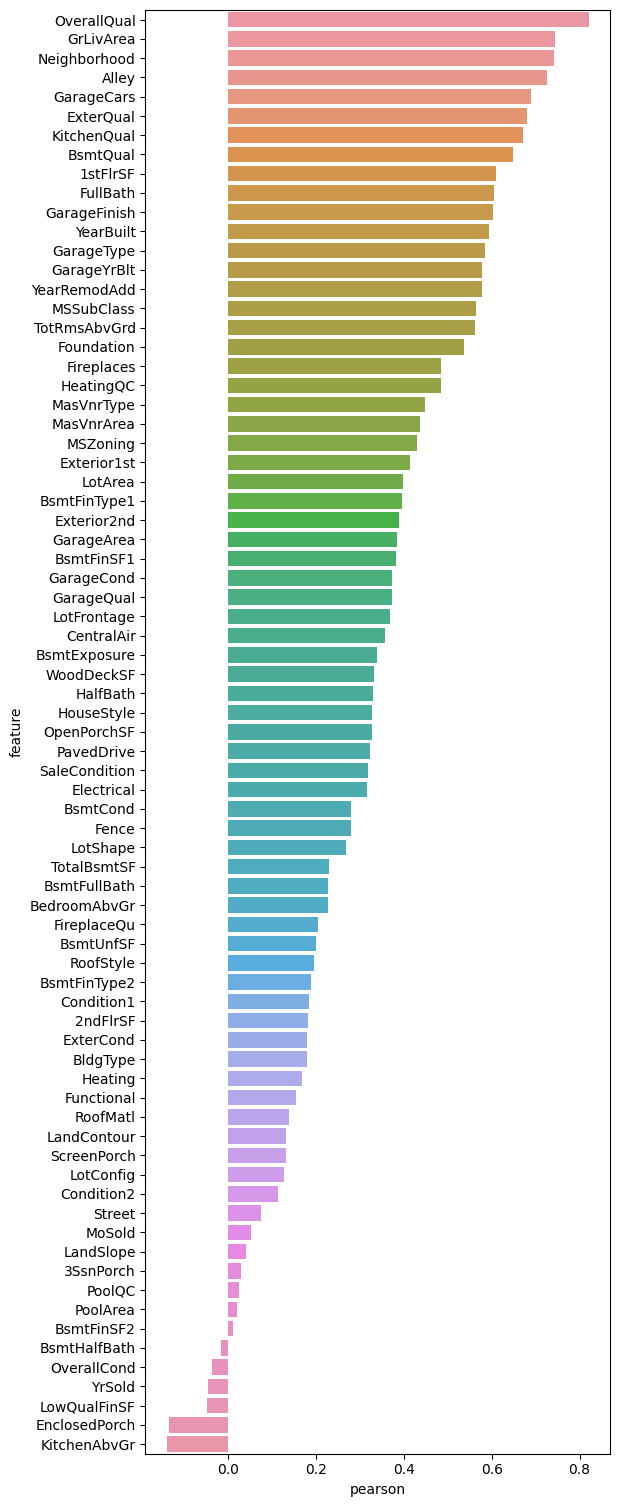

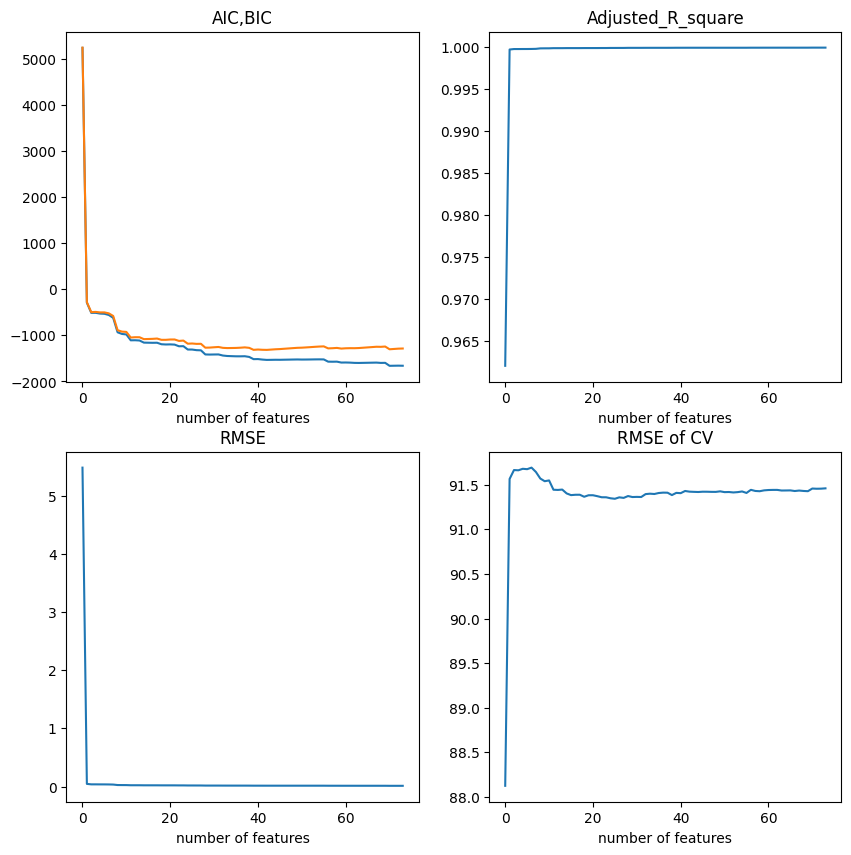

In [416]:
# 표준화 standardscaller



model                                            feature      RMSE  \
0    stepwise1                                      [OverallQual]  0.324261   
1    stepwise2                           [OverallQual, GrLivArea]  0.236164   
2    stepwise3             [OverallQual, GrLivArea, Neighborhood]  0.178774   
3    stepwise4      [OverallQual, GrLivArea, Neighborhood, Alley]  0.170130   
4    stepwise5  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.160214   
..         ...                                                ...       ...   
69  stepwise70  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.079928   
70  stepwise71  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.075711   
71  stepwise72  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.075425   
72  stepwise73  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.075397   
73  stepwise74  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.075136   

    R_square  Adjusted_R_square      F_stastic          AIC          BIC  \
0   0.675739           0.675457  9.471170e-284  1973.845633  1978.894888   
1   0.763836           0.763425   0.000000e+00  1610.635784  1620.734294   
2   0.821226           0.820759   0.000000e+00  1291.914742  1307.062507   
3   0.829870           0.829277   0.000000e+00  1236.819447  1257.016467   
4   0.839786           0.839087   0.000000e+00  1169.641078  1194.887352   
..       ...                ...            ...          ...          ...   
69  0.920072           0.914901   0.000000e+00   498.564362   852.012201   
70  0.924289           0.919317   0.000000e+00   438.112439   796.609532   
71  0.924575           0.919547   0.000000e+00   435.756440   799.302789   
72  0.924603           0.919502   0.000000e+00   437.325562   805.921166   
73  0.924864           0.919706   0.000000e+00   435.333946   808.978805   

     RMSE_CV  
0   0.324261  
1   0.236164  
2   0.178774  
3   0.170130  
4   0.160214  
..       ...  
69  0.079928  
70  0.075711  
71  0.075425  
72  0.075397  
73  0.075136  

[74 rows x 9 columns]

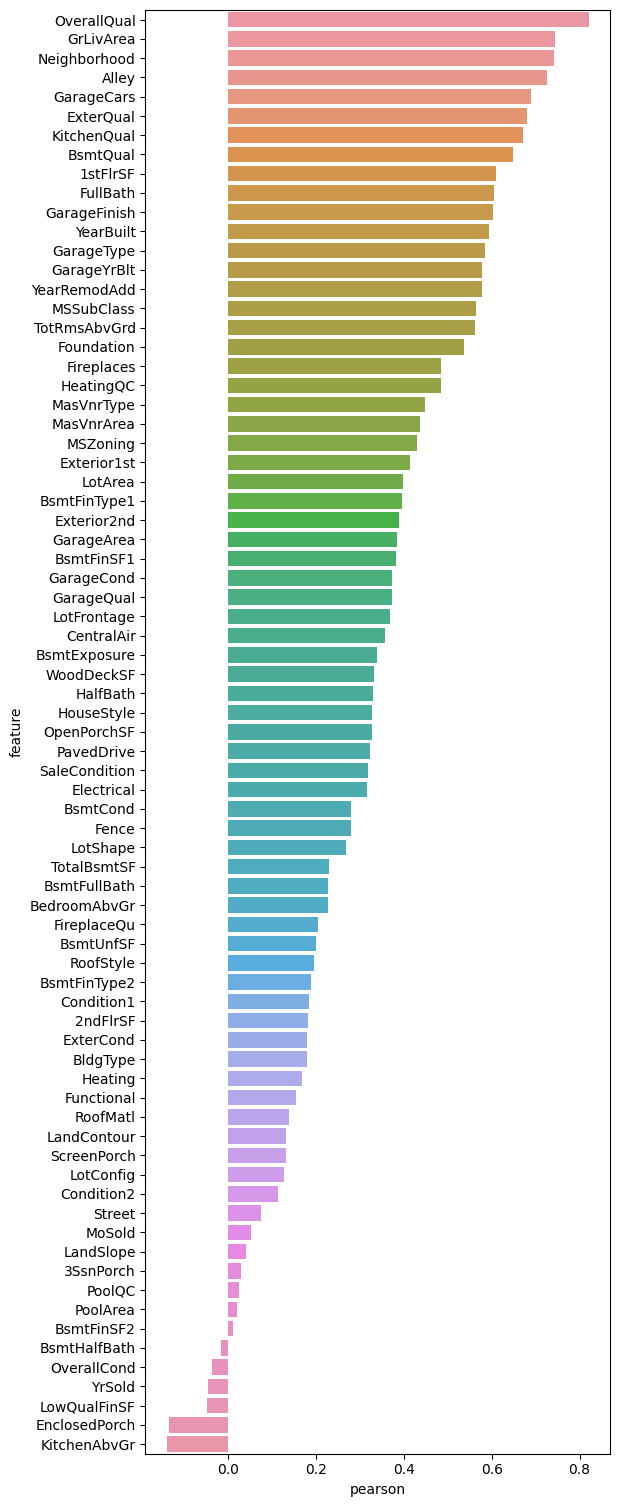

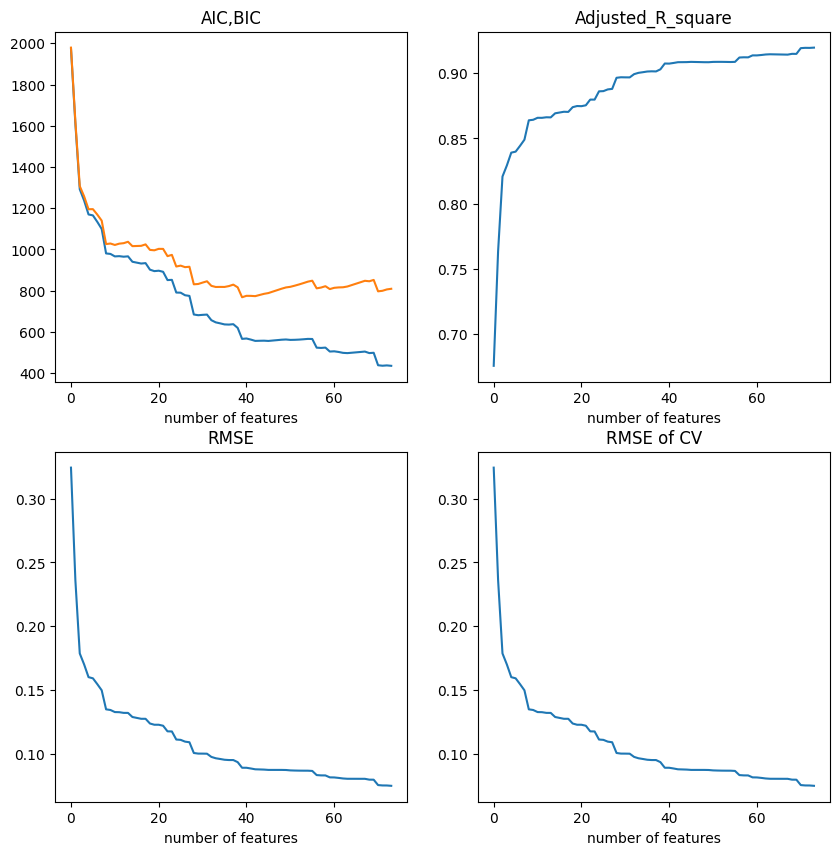

In [431]:
# 정규화(표준화. standardscaler)

def scaling(df) :
    df = df.copy()

    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_train_encoded_log))
    df_scaled.index = df_train_encoded_log.index
    df_scaled.columns = df_train_encoded_log.columns
    return df_scaled

df_train_encoded_log_scaled = scaling(df_train_encoded_log)
df_cv_encoded_log_scaled = scaling(df_cv_encoded_log)

linear_regression_log_scaled = stepwise_regression(df_train_encoded_log_scaled, df_cv_encoded_log_scaled, feats) 

model                                            feature      RMSE  \
0    stepwise1                                      [OverallQual]  0.324261   
1    stepwise2                           [OverallQual, GrLivArea]  0.236164   
2    stepwise3             [OverallQual, GrLivArea, Neighborhood]  0.178774   
3    stepwise4      [OverallQual, GrLivArea, Neighborhood, Alley]  0.170130   
4    stepwise5  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.160214   
..         ...                                                ...       ...   
69  stepwise70  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.078971   
70  stepwise71  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.078959   
71  stepwise72  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.078957   
72  stepwise73  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.078239   
73  stepwise74  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.078154   

    R_square  Adjusted_R_square      F_stastic          AIC          BIC  \
0   0.675739           0.675457  9.471170e-284  1973.845633  1978.894888   
1   0.763836           0.763425   0.000000e+00  1610.635784  1620.734294   
2   0.821226           0.820759   0.000000e+00  1291.914742  1307.062507   
3   0.829870           0.829277   0.000000e+00  1236.819447  1257.016467   
4   0.839786           0.839087   0.000000e+00  1169.641078  1194.887352   
..       ...                ...            ...          ...          ...   
69  0.921029           0.915920   0.000000e+00   484.681025   838.128864   
70  0.921041           0.915855   0.000000e+00   486.507691   845.004785   
71  0.921043           0.915780   0.000000e+00   488.470515   852.016864   
72  0.921761           0.916468   0.000000e+00   479.951981   848.547584   
73  0.921846           0.916482   0.000000e+00   480.693975   854.338833   

     RMSE_CV  
0   0.324261  
1   0.236164  
2   0.178774  
3   0.170130  
4   0.160214  
..       ...  
69  0.078971  
70  0.078959  
71  0.078957  
72  0.078239  
73  0.078154  

[74 rows x 9 columns]

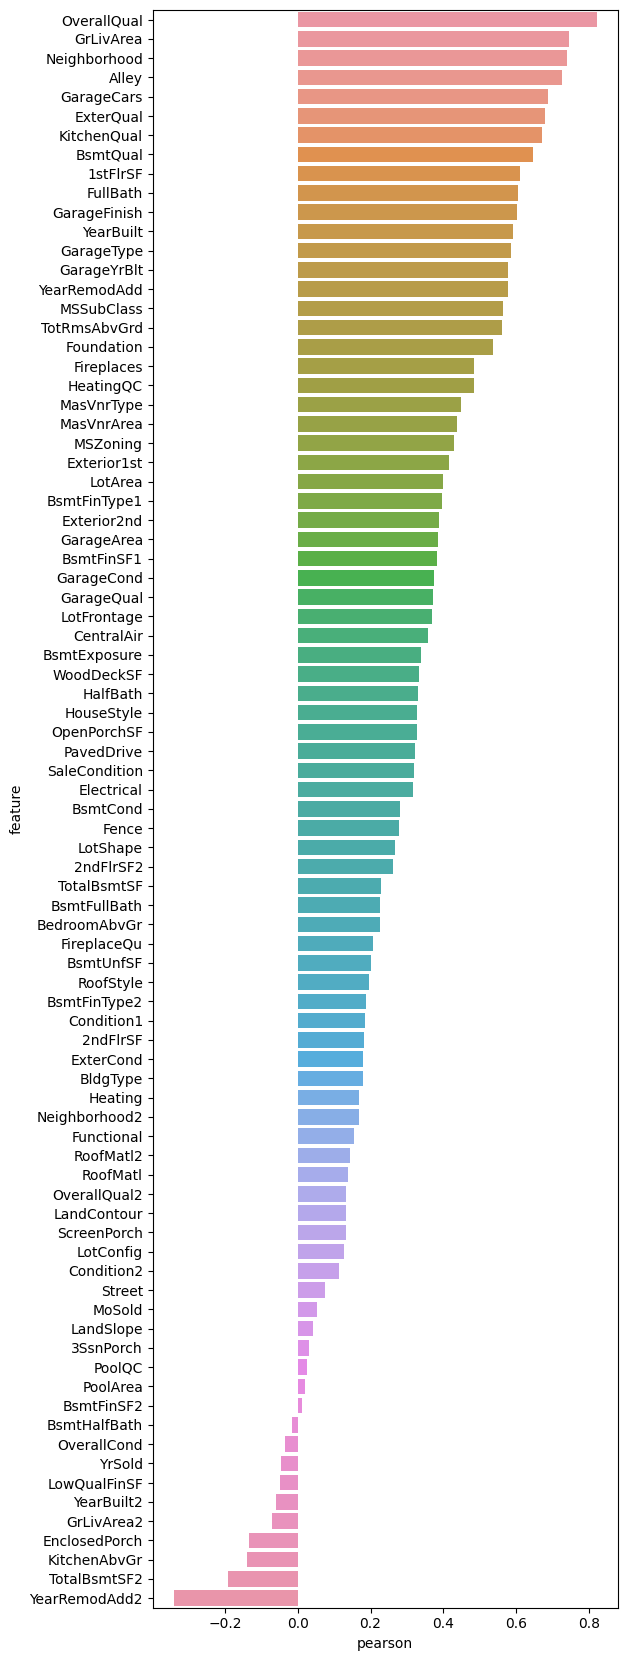

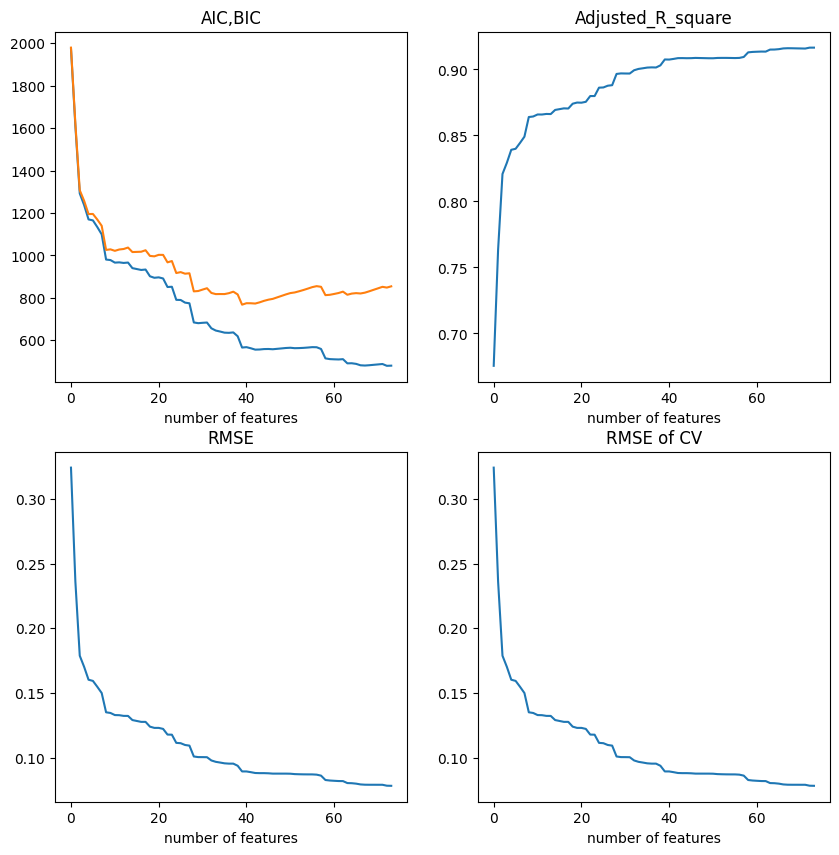

In [433]:
# poly항 추가하기

# 처리8 : quadratic
def quadratic(df, qdr_obj) :
    for i in qdr_obj :
        df[f"{i}2"] = df[i]**2
    return df

qdr_obj = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
        '2ndFlrSF', 'Neighborhood', 'RoofMatl', 'GrLivArea']
qdr_res = [f"{i}2" for i in qdr_obj]

df_train_encoded_log_scaled_quad = quadratic(df_train_encoded_log_scaled, qdr_obj)
df_cv_encoded_log_scaled_quad = quadratic(df_cv_encoded_log_scaled, qdr_obj)


linear_regression_log_scaled_quad = stepwise_regression(df_train_encoded_log_scaled_quad, df_cv_encoded_log_scaled_quad, feats+qdr_res) 

In [420]:
# 잔차분석에서 나온 문제점 해결 : 다중공선성, 누락변수

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(10,30))

sns.heatmap(df_train_encoded[feats_n].corr(), ax=axs[0], cmap='coolwarm')
sns.heatmap(df_train_encoded[feats_c].corr(), ax=axs[1], cmap='coolwarm')
corr_cross = df_train_encoded.corr()[feats_n].loc[feats_c,:]
sns.heatmap(corr_cross, ax=axs[2] , cmap='coolwarm')
plt.show()

In [ ]:
df_test['YearBuilt']

Id
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
       ... 
1165    1.0
1166    1.0
1167    1.0
1168    1.0
1169    1.0
Name: ExterQual:OverallQual, Length: 1152, dtype: float64 Id
1       1.042717
2      -0.693136
3       1.042717
4      -0.693136
5       1.042717
          ...   
1165   -0.693136
1166    1.042717
1167    1.042717
1168   -0.693136
1169   -0.693136
Name: ExterQual, Length: 1152, dtype: float64 Id
1       1.042717
2      -0.693136
3       1.042717
4      -0.693136
5       1.042717
          ...   
1165   -0.693136
1166    1.042717
1167    1.042717
1168   -0.693136
1169   -0.693136
Length: 1152, dtype: float64
Id
1       1.042717
2      -0.693136
3       1.042717
4      -0.693136
5       1.042717
          ...   
1165   -0.693136
1166    1.042717
1167    1.042717
1168   -0.693136
1169   -0.693136
Name: ExterQual:OverallQual, Length: 1152, dtype: float64 Id
1       0.648913
2      -0.075455
3       0.648913
4       0.648913
5       1.373282
          ...   

model                                            feature      RMSE  \
0    stepwise1                                      [OverallQual]  0.324261   
1    stepwise2                           [OverallQual, GrLivArea]  0.236164   
2    stepwise3             [OverallQual, GrLivArea, Neighborhood]  0.178774   
3    stepwise4      [OverallQual, GrLivArea, Neighborhood, Alley]  0.170130   
4    stepwise5  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.160214   
..         ...                                                ...       ...   
69  stepwise70  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.075823   
70  stepwise71  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.075628   
71  stepwise72  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.075614   
72  stepwise73  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.075611   
73  stepwise74  [OverallQual, GrLivArea, Neighborhood, Alley, ...  0.075552   

    R_square  Adjusted_R_square      F_stastic          AIC          BIC  \
0   0.675739           0.675457  1.663966e-283  1975.845633  1985.944143   
1   0.763836           0.763425   0.000000e+00  1612.635784  1627.783549   
2   0.821226           0.820759   0.000000e+00  1293.914742  1314.111761   
3   0.829870           0.829277   0.000000e+00  1238.819447  1264.065722   
4   0.839786           0.839087   0.000000e+00  1171.641078  1201.936607   
..       ...                ...            ...          ...          ...   
69  0.924177           0.919268   0.000000e+00   439.811930   798.309023   
70  0.924372           0.919400   0.000000e+00   438.851330   802.397679   
71  0.924386           0.919341   0.000000e+00   440.633655   809.229258   
72  0.924389           0.919269   0.000000e+00   442.587044   816.231903   
73  0.924448           0.919257   0.000000e+00   443.696272   822.390385   

     RMSE_CV  
0   0.324261  
1   0.236164  
2   0.178774  
3   0.170130  
4   0.160214  
..       ...  
69  0.075823  
70  0.075628  
71  0.075614  
72  0.075611  
73  0.075552  

[74 rows x 9 columns]

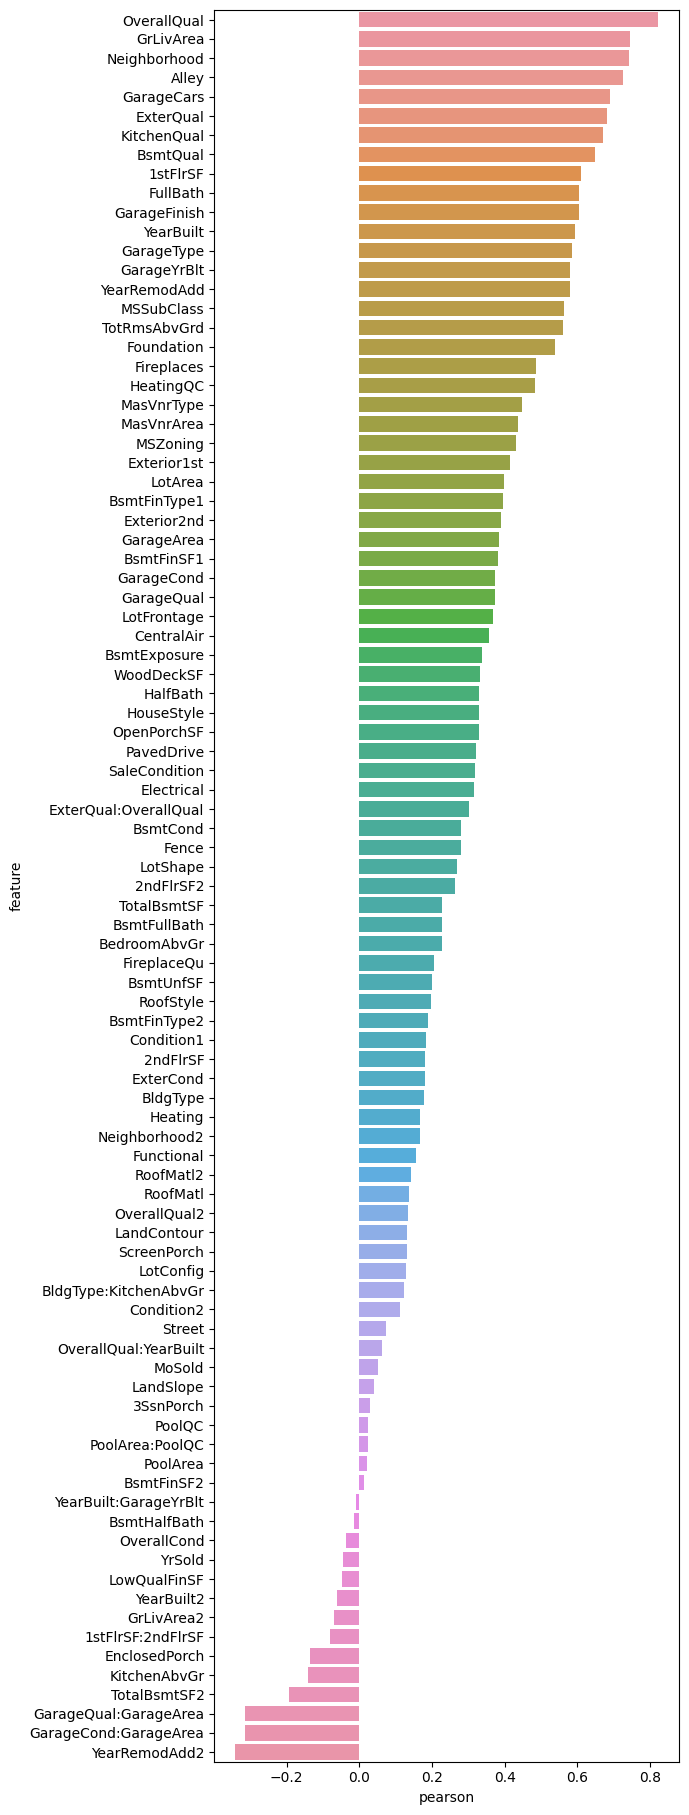

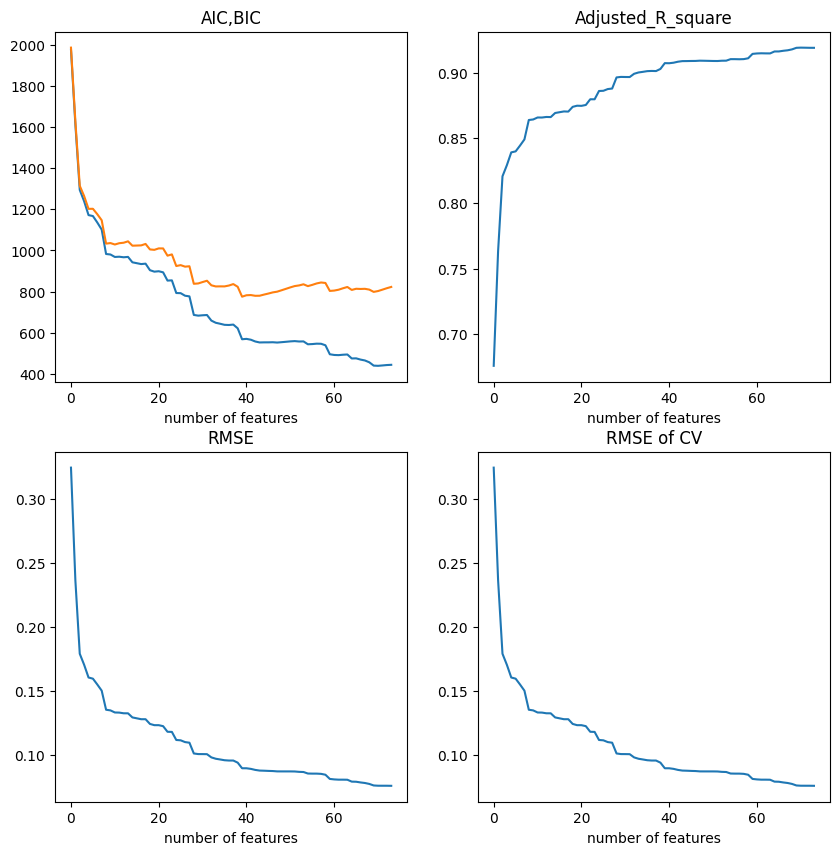

In [480]:
# 상관계수항 포함

corr_obj = ['ExterQual:OverallQual',             
            'PoolArea:PoolQC', 
            '1stFlrSF:2ndFlrSF', 
          'OverallQual:YearBuilt', 
          'BldgType:KitchenAbvGr', 
          'YearBuilt:GarageYrBlt', 
          'GarageCond:GarageArea',
          'GarageQual:GarageArea']

def interaction(df, corr_obj) :
    df_interact = df.copy()
    for i in corr_obj :
        df[i] = np.ones(len(df))
        factors = i.split(":")        
        for j in factors :
            df[i] *= df[j]

    return df_interact

df_train_encoded_log_scaled_quad_interact = interaction(df_train_encoded_log_scaled_quad, corr_obj)
df_cv_encoded_log_scaled_quad_interact = interaction(df_cv_encoded_log_scaled_quad, corr_obj)

linear_regression_log_scaled_quad_interact = stepwise_regression(df_train_encoded_log_scaled_quad_interact, df_cv_encoded_log_scaled_quad_interact, feats+qdr_res+corr_obj) 


In [472]:
df_cv_encoded_log_scaled_quad_interact[corr_obj[0]].value_counts()

0.0    1152
Name: ExterQual:OverallQual, dtype: int64

In [474]:
fron = np.ones(10)
df[]
#df_cv_encoded_log_scaled_quad_interact
fron

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:


predictor = ['OverallQual', 'GrLivArea']
outcome = "SalePrice"

#X = sm.add_constant(df_train[predictor])
X = df_train[predictor]
X = sm.add_constant(X)
y = df_train[outcome]

model = OLS(y,X)
result = model.fit()
prediction =  result.predict(X)      

result.summary()
        
        

In [ ]:
predictor = ['OverallQual', 'GrLivArea']
outcome = "SalePrice"

#X = sm.add_constant(df_train[predictor])
X = df_train[predictor]
X = sm.add_constant(X)
y = df_train[outcome]

model = OLS(y,X)
result = model.fit()
prediction =  result.predict(X)     

In [440]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'SalePrice ~ OverallQual + GrLivArea + OverallQual*GrLivArea', data=df_train_encoded)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1259.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:45:24   Log-Likelihood:                 253.96
No. Observations:                1152   AIC:                            -499.9
Df Residuals:                    1148   BIC:                            -479.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.6807      0.898      8.550      0.000       5.918       9.443
OverallQual              -0.4049      0.148     -2.734      0.006      -0.695      -0.114
GrLivArea                 1.6716      0.456      3.669      0.000       0.778       2.566
OverallQual:GrLivArea     0.2887      0.074      3.887      0.000       0.143       0.434
==============================================================================
Omnibus:                      220.185   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.087
Skew:                          -0.933   Prob(JB):                    3.50e-153
Kurtosis:                       6.338   Cond. No.                     2.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

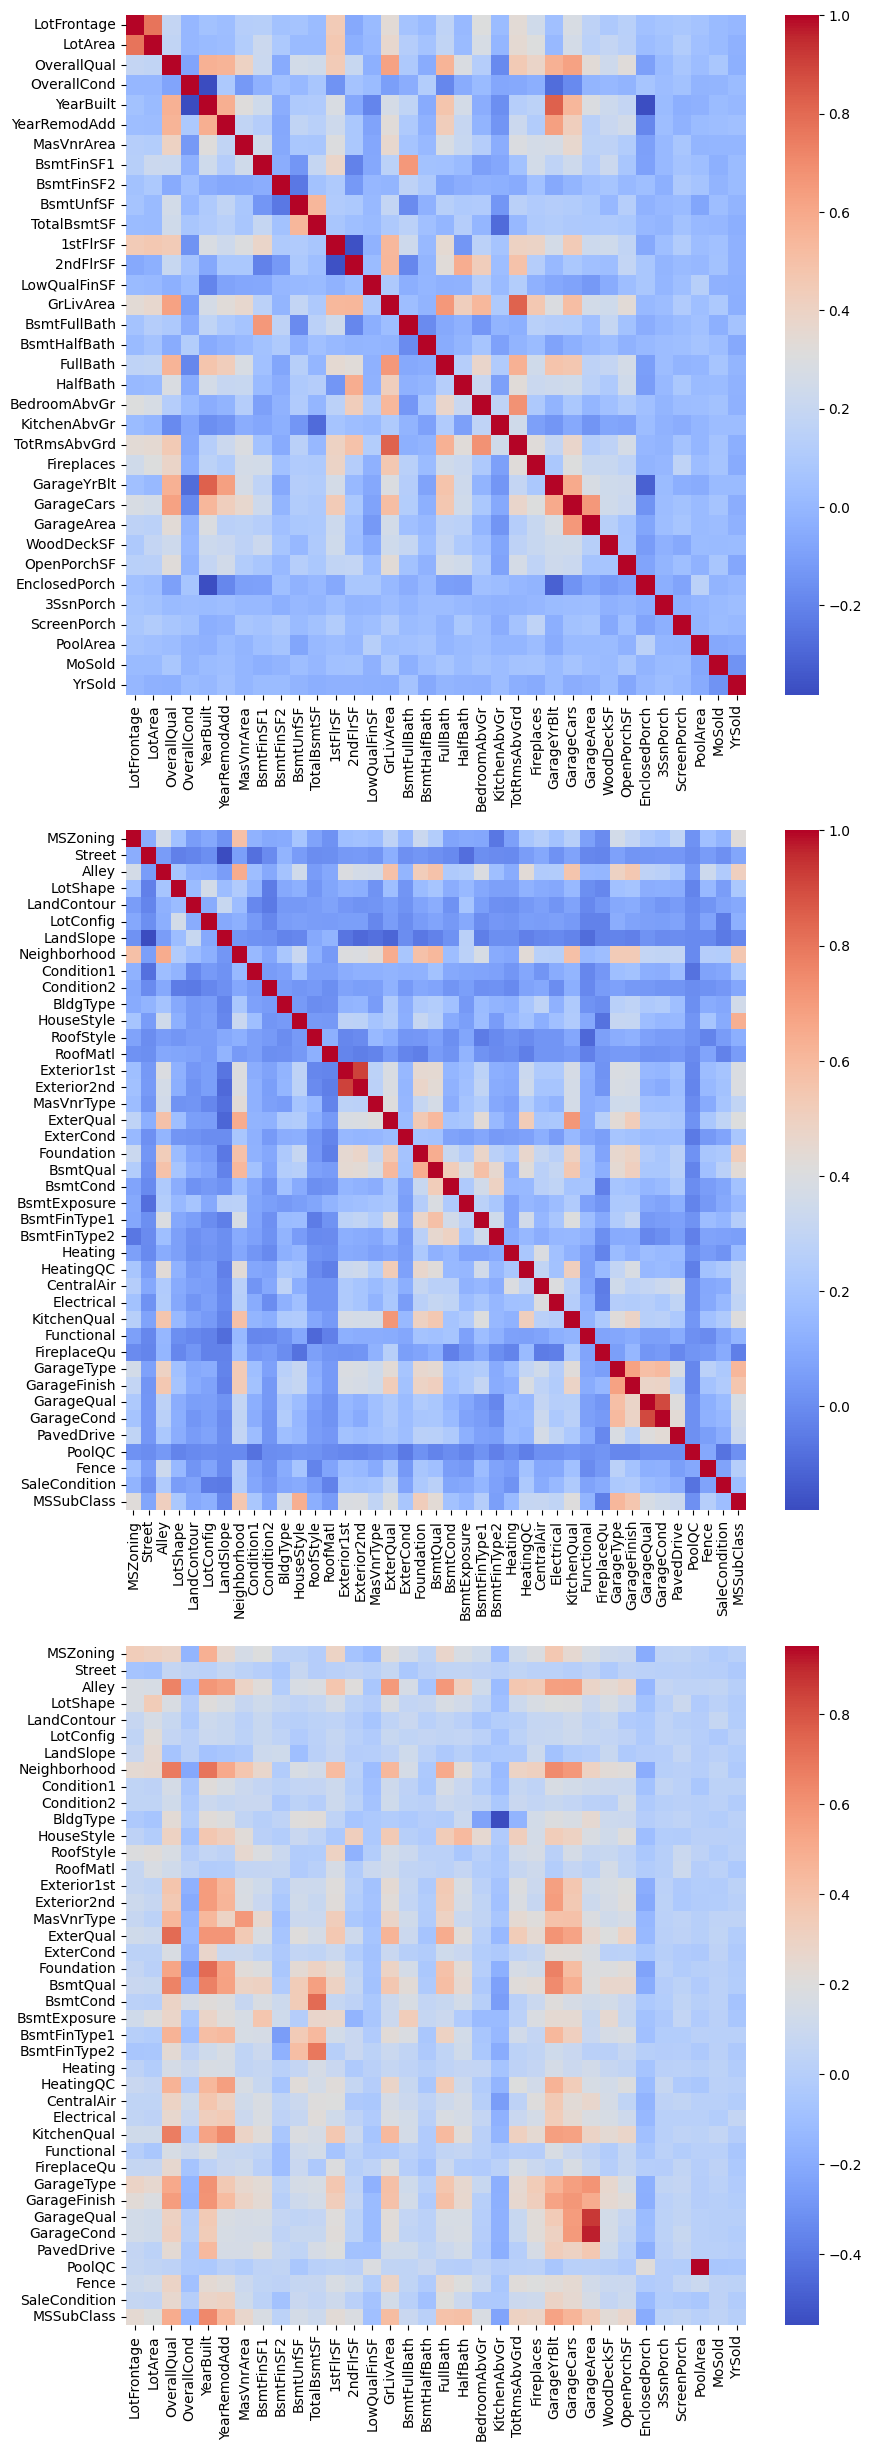

In [447]:
a = df_train_encoded.corr()[feats_c]
a.loc[feats_n,:]
a

MSZoning    Street     Alley  LotShape  LandContour  \
MSSubClass             0.421936  0.081403  0.506047  0.219712     0.093053   
MSZoning               1.000000  0.109673  0.366536  0.188620     0.054971   
LotFrontage            0.334150 -0.069990  0.168130  0.168998     0.076507   
LotArea                0.310935 -0.086220  0.159789  0.339729     0.154674   
Street                 0.109673  1.000000  0.046007 -0.035989    -0.021758   
...                         ...       ...       ...       ...          ...   
MoSold                -0.021935 -0.002721  0.050505  0.021934     0.071102   
YrSold                 0.010371 -0.038605  0.006151 -0.018540    -0.015626   
SaleCondition          0.132182  0.012807  0.235257  0.050976     0.072218   
SalePrice              0.430277  0.074036  0.726164  0.267942     0.131281   
OverallQual_GrLivArea  0.287651  0.064285  0.663999  0.175638     0.081090   

                       LotConfig  LandSlope  Neighborhood  Condition1  \
MSSubClass              0.119305  -0.016218      0.544239    0.212504   
MSZoning                0.090643   0.017245      0.572738    0.128322   
LotFrontage             0.046891   0.084639      0.237936    0.044440   
LotArea                 0.217649   0.248230      0.254736    0.031416   
Street                  0.006619  -0.180033      0.059519   -0.078998   
...                          ...        ...           ...         ...   
MoSold                 -0.034495   0.017958      0.044072    0.028979   
YrSold                  0.020505  -0.012933     -0.029165    0.026104   
SaleCondition          -0.049544  -0.053768      0.245020    0.085894   
SalePrice               0.127505   0.041011      0.741692    0.183899   
OverallQual_GrLivArea   0.067110  -0.063484      0.675868    0.148721   

                       Condition2  ...  FireplaceQu  GarageType  GarageFinish  \
MSSubClass               0.085398  ...    -0.040386    0.609813      0.549620   
MSZoning                 0.094721  ...    -0.001651    0.363574      0.299564   
LotFrontage              0.045135  ...     0.071145    0.287807      0.220206   
LotArea                  0.045495  ...     0.077332    0.252564      0.182346   
Street                  -0.003635  ...    -0.021471    0.067736      0.023033   
...                           ...  ...          ...         ...           ...   
MoSold                   0.022958  ...     0.036083    0.023855      0.002639   
YrSold                  -0.019393  ...    -0.044793   -0.023369     -0.011219   
SaleCondition            0.033896  ...     0.099310    0.221090      0.235975   
SalePrice                0.113356  ...     0.205784    0.585403      0.603769   
OverallQual_GrLivArea    0.126405  ...     0.255926    0.515120      0.558796   

                       GarageQual  GarageCond  PavedDrive    PoolQC     Fence  \
MSSubClass               0.380842    0.353438    0.334432  0.011834  0.256444   
MSZoning                 0.227930    0.198690    0.291443  0.014378  0.183743   
LotFrontage              0.134123    0.132550    0.061495  0.068077  0.102586   
LotArea                  0.121043    0.123155    0.027980  0.050581  0.128540   
Street                   0.030646    0.033354    0.035992  0.002700  0.046790   
...                           ...         ...         ...       ...       ...   
MoSold                   0.006584    0.005249    0.011772 -0.062628  0.031744   
YrSold                   0.004568   -0.010314   -0.002149 -0.056901  0.026359   
SaleCondition            0.162209    0.143169    0.109448 -0.071652  0.073211   
SalePrice                0.373037    0.373771    0.322129  0.024272  0.279062   
OverallQual_GrLivArea    0.302853    0.313940    0.231582  0.036401  0.296572   

                       SaleCondition  MSSubClass  
MSSubClass                  0.171224    1.000000  
MSZoning                    0.132182    0.421936  
LotFrontage                 0.070047    0.241547  
LotArea                     0.056983    0.194602  
Street  

In [423]:
# 릿지회귀